# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [157]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

# Business Understanding
Analyzing Attributes of customers
* recommmand credit scores
* payment behaviour
* predict payment behaviour
* calculate credit scores

Business Question: How can the client, the mail order company acquire new clients more efficiently?

1) Attributes & the demographic of the existing clients
2) Analyze Attributes of the demographics of the existing clients
3) Match them againts the data set containing attributes for people in germany
4) Figure out, which people from the big data set are most likely new customers for the client, the mail order company selling organic products


Efficiency in the customer acquisition process.
Focus on a specific people instead of the whole group.
Only ask people that are most like to bertelsmann.
Targeted Advertising

3 Phases
* Customer Segmentation Report
* Supervised Learning Model
* Kaggle Competition

But before we start with the Customer Segmentation Report we need to understand the data.


## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## 0.1 Get to know the data 

### Get an overview of the azdias data

In [771]:
import time
from dask import dataframe as dd
start = time.time()
dask_df = dd.read_csv('Azdias.csv',
                     dtype={'CAMEO_DEUG_2015': 'object',
                           'CAMEO_INTL_2015': 'object'})
end = time.time()
print("Read csv with dask: ",(end-start),"sec")


Read csv with dask:  0.03890419006347656 sec


In [772]:
# Create a dask dataframe
azdias = dask_df.copy()


In [773]:
# Convert dask_df to pandas dataframe
azdias = azdias.compute()

In [161]:
azdias.shape
# The dataframe azdias contains 366 Columns and 891 211 rows

(891221, 367)

In [162]:
# Set Max Rows
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)



In [774]:
# Take a look at the provided data head 
azdias.head(5)

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,...,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,910215,-1,NaN,...,NaN,3,1,2
1,1,910220,-1,9.0,...,4.0,5,2,1
2,2,910225,-1,9.0,...,2.0,5,2,3
3,3,910226,2,1.0,...,7.0,3,2,4
4,4,910241,-1,1.0,...,3.0,4,1,3


In [775]:
# Drop Unnamed Column 0 caused by csv export
azdias = azdias.drop(columns=['Unnamed: 0'],axis=1)

In [776]:
# Take a look at the provided data tail 
azdias.tail(5)

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,...,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
52079,825761,-1,5.0,17.0,...,3.0,4,2,3
52080,825771,-1,9.0,16.0,...,5.0,6,1,2
52081,825772,-1,1.0,17.0,...,7.0,4,2,2
52082,825776,-1,9.0,0.0,...,5.0,5,1,1
52083,825787,-1,1.0,0.0,...,4.0,3,1,4


### Azdias Null Values Data Frame

In [166]:
# Check null values
pd.set_option('display.max_rows', 366)

# Create a dataframe with null values
azdias_null=azdias.isnull().sum().sort_values(ascending=False)/len(azdias)




In [167]:
# Check head data
azdias_null.head()

ALTER_KIND4    0.998648
ALTER_KIND3    0.993077
ALTER_KIND2    0.966900
ALTER_KIND1    0.909048
EXTSEL992      0.733996
dtype: float64

In [168]:
# Create dataframe for null values from azdias
df_azdias_null = pd.DataFrame(azdias_null).reset_index()
df_azdias_null.columns=['Column','Nullvalues']
df_azdias_null.head()


,Column,Nullvalues
0,ALTER_KIND4,0.998648
1,ALTER_KIND3,0.993077
2,ALTER_KIND2,0.966900
3,ALTER_KIND1,0.909048
4,EXTSEL992,0.733996


In [169]:
# Analyze Null Values distribution
df_azdias_null.Nullvalues.describe()

count    366.000000
mean       0.102680
std        0.121640
min        0.000000
25%        0.000000
50%        0.118714
75%        0.120230
max        0.998648
Name: Nullvalues, dtype: float64

In [170]:
# Analyze the top Null Values
df_azdias_null[df_azdias_null['Nullvalues']>0].head(50)

,Column,Nullvalues
0,ALTER_KIND4,0.998648
1,ALTER_KIND3,0.993077
2,ALTER_KIND2,0.966900
3,ALTER_KIND1,0.909048
4,EXTSEL992,0.733996
5,KK_KUNDENTYP,0.655967
6,ALTERSKATEGORIE_FEIN,0.295041
7,D19_LETZTER_KAUF_BRANCHE,0.288495
8,D19_LOTTO,0.288495
9,D19_VERSI_ONLINE_QUOTE_12,0.288495


In [171]:
data=df_azdias_null[df_azdias_null['Nullvalues']>0].head(50)

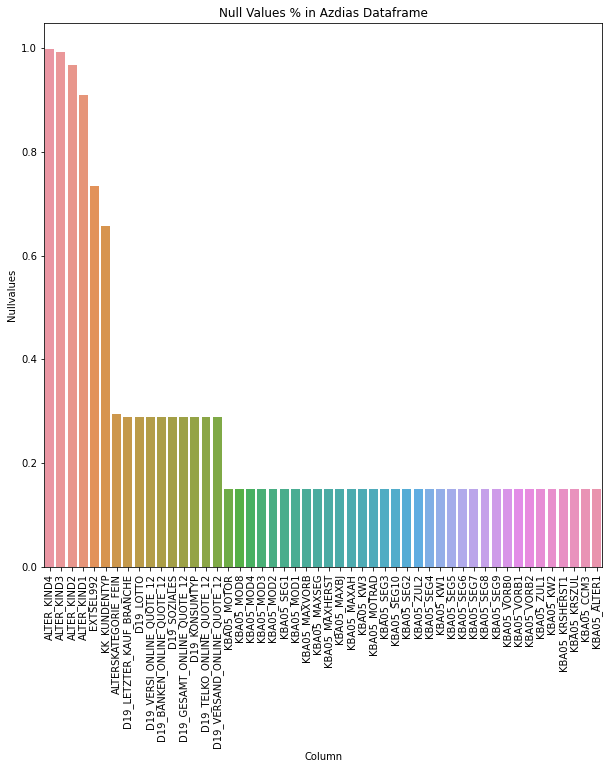

In [172]:
import seaborn as sns

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
ax.set_title('Null Values % in Azdias Dataframe')

ax = sns.barplot(x="Column", y="Nullvalues", data=data)



C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


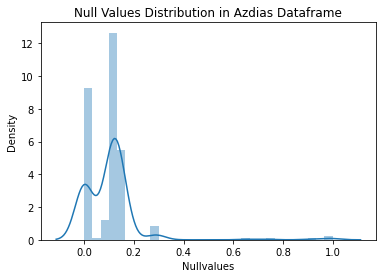

In [173]:
# Distribution Plot of the null values
import seaborn as sns, numpy as np
x = df_azdias_null['Nullvalues']
plt.title('Null Values Distribution in Azdias Dataframe')

ax = sns.distplot(x)

In [174]:
print('columns having  missing values >0% : ', len(df_azdias_null[df_azdias_null['Nullvalues']>0]))
print('columns having  missing values >10% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.1]))
print('columns having  missing values >20% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.2]))
print('columns having  missing values >30% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.3]))
print('columns having  missing values >40% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.4]))
print('columns having  missing values >50% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.5]))
print('columns having  missing values >60% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.6]))
print('columns having  missing values >70% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.7]))
print('columns having  missing values >80% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.8]))
print('columns having  missing values >90% : ',len(df_azdias_null[df_azdias_null['Nullvalues']>0.9]))


columns having  missing values >0% :  273
columns having  missing values >10% :  237
columns having  missing values >20% :  16
columns having  missing values >30% :  6
columns having  missing values >40% :  6
columns having  missing values >50% :  6
columns having  missing values >60% :  6
columns having  missing values >70% :  5
columns having  missing values >80% :  4
columns having  missing values >90% :  4


C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


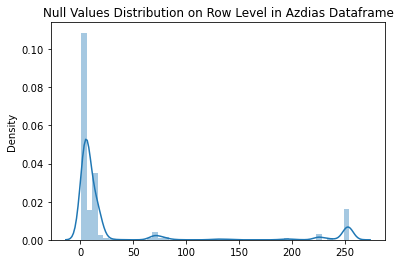

In [175]:
# Check Null Values based on row level
row_nans = azdias[azdias.isnull().sum(axis=1) > 0].isnull().sum(axis=1)

# Distribution Plot of the null values
import seaborn as sns, numpy as np
plt.title('Null Values Distribution on Row Level in Azdias Dataframe')

ax = sns.distplot(row_nans)

### Result Analysis Null Values in the azdias dataframe
From the above analysis of the null values distribution in the azdias dataframe we can conclude, that the average value for null values is 10 %. More than 25 % have no missing values. 50 % only have 11.18 % null values and 75 % only have 12 % null values. 

The maximum of missing values is 99.86 %. If we take a closer look at the top missing value columns we can conclude, that the columns containing information about the age of the children. So it is obvious, that we have more data without many children.



### Get an overview of the customer data

In [176]:
# Load in the data
customers = pd.read_csv('Customers.csv',dtype={'CAMEO_DEUG_2015': 'object',
                           'CAMEO_INTL_2015': 'object'})
 

In [177]:
# Shape
customers.shape

# The dataframe azdias contains 369 Columns and 191 652 rows

(191652, 370)

In [178]:
# Take a look at the provided data head 
customers.head()

,Unnamed: 0,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,...,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,0,9626,2,1.0,10.0,...,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
1,1,9628,-1,9.0,11.0,...,FOOD,SINGLE_BUYER,0,1,4
2,2,143872,-1,1.0,6.0,...,COSMETIC_AND_FOOD,MULTI_BUYER,0,2,4
3,3,143873,1,1.0,8.0,...,COSMETIC,MULTI_BUYER,0,1,4
4,4,143874,-1,1.0,20.0,...,FOOD,MULTI_BUYER,0,1,3


In [179]:
# Drop column
customers=customers.drop(['Unnamed: 0'],axis=1)

In [180]:
# Take a look at the provided data tail 
customers.tail()


,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,...,PRODUCT_GROUP,CUSTOMER_GROUP,ONLINE_PURCHASE,ANREDE_KZ,ALTERSKATEGORIE_GROB
191647,154561,1,1.0,9.0,NaN,...,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,3
191648,154563,-1,2.0,0.0,NaN,...,COSMETIC,SINGLE_BUYER,0,2,4
191649,148813,2,1.0,15.0,NaN,...,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,4
191650,148852,3,1.0,13.0,NaN,...,FOOD,SINGLE_BUYER,0,2,3
191651,148883,3,1.0,0.0,NaN,...,COSMETIC_AND_FOOD,MULTI_BUYER,0,1,2


### Customers Null Values Data Frame


In [181]:
# Check null values
pd.set_option('display.max_rows', 1000)

In [182]:
# Create a dataframe with null values
customers_null=customers.isnull().sum().sort_values(ascending=False)/len(customers)

In [183]:
# Create dataframe for null values from azdias
df_customers_null = pd.DataFrame(customers_null).reset_index()
df_customers_null.columns=['Column','Nullvalues']
df_customers_null.head()


,Column,Nullvalues
0,ALTER_KIND4,0.998769
1,ALTER_KIND3,0.993347
2,ALTER_KIND2,0.973389
3,ALTER_KIND1,0.938607
4,KK_KUNDENTYP,0.584064


In [184]:
# Analyze Null Values distribution
df_customers_null.Nullvalues.describe()

count    369.000000
mean       0.196049
std        0.151437
min        0.000000
25%        0.000000
50%        0.267574
75%        0.267574
max        0.998769
Name: Nullvalues, dtype: float64

In [185]:
# Analyze the top Null Values
df_customers_null[df_customers_null['Nullvalues']>0].head(50)


,Column,Nullvalues
0,ALTER_KIND4,0.998769
1,ALTER_KIND3,0.993347
2,ALTER_KIND2,0.973389
3,ALTER_KIND1,0.938607
4,KK_KUNDENTYP,0.584064
5,EXTSEL992,0.444989
6,KBA05_SEG7,0.292092
7,KBA05_KW1,0.292092
8,KBA05_SEG4,0.292092
9,KBA05_SEG5,0.292092


In [186]:
data=df_customers_null[df_customers_null['Nullvalues']>0].head(50)

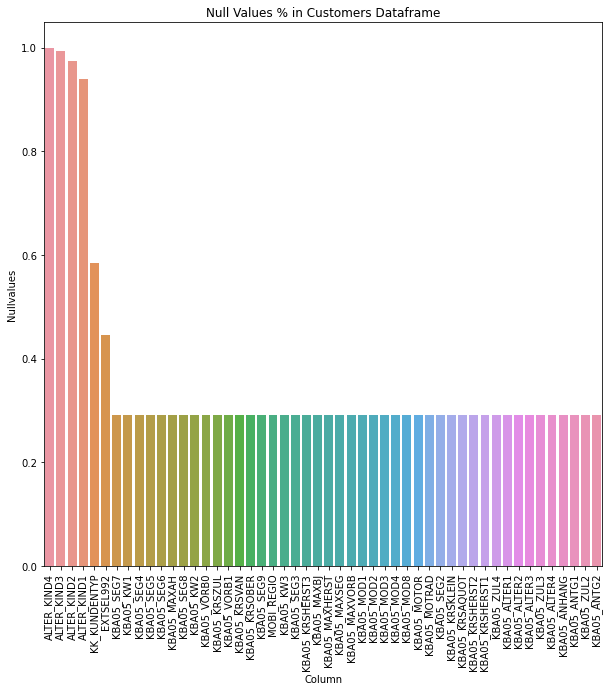

In [187]:
import seaborn as sns

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
ax.set_title('Null Values % in Customers Dataframe')

ax = sns.barplot(x="Column", y="Nullvalues", data=data)



C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


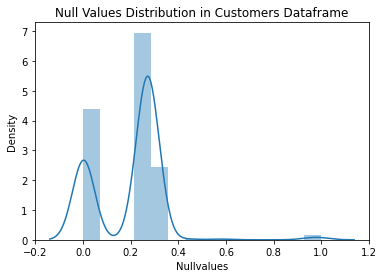

In [188]:
# Distribution Plot of the null values
import seaborn as sns, numpy as np
x = df_customers_null['Nullvalues']
plt.title('Null Values Distribution in Customers Dataframe')

ax = sns.distplot(x)

In [189]:
print('columns having  missing values >0% : ', len(df_customers_null[df_customers_null['Nullvalues']>0]))
print('columns having  missing values >10% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.1]))
print('columns having  missing values >20% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.2]))
print('columns having  missing values >30% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.3]))
print('columns having  missing values >40% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.4]))
print('columns having  missing values >50% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.5]))
print('columns having  missing values >60% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.6]))
print('columns having  missing values >70% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.7]))
print('columns having  missing values >80% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.8]))
print('columns having  missing values >90% : ',len(df_customers_null[df_customers_null['Nullvalues']>0.9]))


columns having  missing values >0% :  273
columns having  missing values >10% :  253
columns having  missing values >20% :  253
columns having  missing values >30% :  6
columns having  missing values >40% :  6
columns having  missing values >50% :  5
columns having  missing values >60% :  4
columns having  missing values >70% :  4
columns having  missing values >80% :  4
columns having  missing values >90% :  4


C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


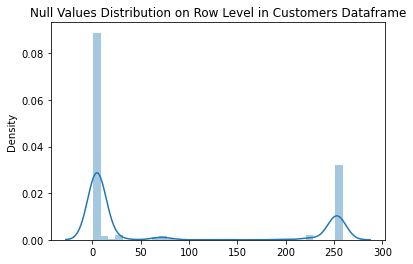

In [190]:
# Check Null Values based on row level
row_nans = customers[customers.isnull().sum(axis=1) > 0].isnull().sum(axis=1)

# Distribution Plot of the null values
import seaborn as sns, numpy as np
plt.title('Null Values Distribution on Row Level in Customers Dataframe')

ax = sns.distplot(row_nans)

## Result Analysis Null Values in the customers dataframe
From the above analysis of the null values distribution in the customers dataframe we can conclude, that the average value for null values is 19.6 %. More than 25 % have no missing values. 50 % only have 26 % null values and 75 % only have 26 % null values. 

The maximum of missing values is 99.86 %. If we take a closer look at the top missing value columns we can conclude, that the columns containing information about the age of the children. So it is obvious, that we have more data without many children.



## Meta Data Comparison Customer vs. Azdias Data


After that we had a closer look on each dataframe we now want to comapre the meta data between customer and azdias data.

In [191]:
df_customers_null.describe()

,Nullvalues
count,369.000000
mean,0.196049
std,0.151437
min,0.000000
25%,0.000000
50%,0.267574
75%,0.267574
max,0.998769


In [192]:
df_azdias_null.describe()

,Nullvalues
count,366.000000
mean,0.102680
std,0.121640
min,0.000000
25%,0.000000
50%,0.118714
75%,0.120230
max,0.998648


C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


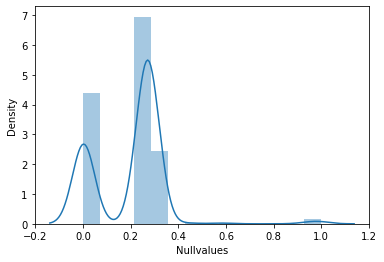

In [193]:
# CUSTOMERS
x = df_customers_null['Nullvalues']
ax = sns.distplot(x)

C:\Users\49151\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


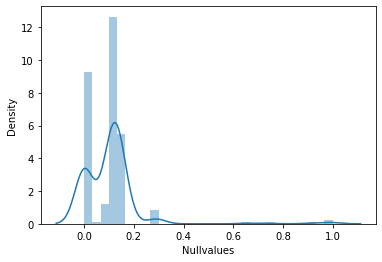

In [194]:
# AZDIAS
x = df_azdias_null['Nullvalues']
ax = sns.distplot(x)

From the abouve comparison we can conclude:
* That the customers dataframe contains more null values compared to the azdias data (Mean Null Value is 19.6 % VS. 10.2 %)
* That the customers dataframe contains 50 & 75 % contains more null values compared to the azdias
* The data quality in the customers is worse than the azdias data

We now neeed to have a closer look on the null value columns.

In [195]:
# Merge Data Frames based on columns and show differences

#Create Copy
df_result_null_value_comparison = df_azdias_null.copy()

#Merge Azdias and Customers Null Value dataframe
df_result_null_value_comparison=df_result_null_value_comparison.merge(df_customers_null, on='Column', how='left',suffixes=('_Azdias', '_Customers'))

# Calculate Difference - With Absolute Difference
df_result_null_value_comparison['Delta']=abs(df_result_null_value_comparison.Nullvalues_Azdias-df_result_null_value_comparison.Nullvalues_Customers)

# Show Top 10 Delta
df_result_null_value_comparison.sort_values(ascending=False, by=['Delta']).head(10)



,Column,Nullvalues_Azdias,Nullvalues_Customers,Delta
4,EXTSEL992,0.733996,0.444989,0.289008
252,RT_UEBERGROESSE,0.057478,0.230585,0.173106
237,VK_DISTANZ,0.085183,0.249781,0.164598
238,VK_DHT4A,0.085183,0.249781,0.164598
239,VK_ZG11,0.085183,0.249781,0.164598
219,ANZ_HH_TITEL,0.108848,0.271899,0.163051
245,TITEL_KZ,0.082470,0.243128,0.160658
241,AKT_DAT_KL,0.082470,0.243128,0.160658
242,EINGEZOGENAM_HH_JAHR,0.082470,0.243128,0.160658
244,VHA,0.082470,0.243128,0.160658


In [196]:
# How many columns contains different null values?
df_result_null_value_comparison[df_result_null_value_comparison['Delta']>0].count()

Column                  273
Nullvalues_Azdias       273
Nullvalues_Customers    273
Delta                   273
dtype: int64

In [197]:
# How many columns do not contains different null values?
df_result_null_value_comparison[df_result_null_value_comparison['Delta']==0].count()

Column                  93
Nullvalues_Azdias       93
Nullvalues_Customers    93
Delta                   93
dtype: int64

## Results from the null value delta comparison
There are 273 columns that shows differences in null values proportion between the two dataframes.
There are 93 columns that have no differences in the null values proportion between the two dataframes.

From the above analysis we can see that there is onOe feature that has significant high portion of null values.
So we decide to delete the feature EXTSEL992 from both data sets.

Furthermore we can see from the above table that there are significantly more null values in the Customers dataframe compared to the Null Values in the Azdias frame.


## Compare distinct values

After we've analyzed the null values distribution among the two dataframes we now analze the distinct values in each column in each dataframe. So we can see if there are any special data points that are unique to one dataframe.

In [198]:
# Unique Values Azidas 
df_azdidas_set = azdias.nunique().copy()

# Create Dataframe
df_azdidas_set = pd.DataFrame(df_azdidas_set).reset_index()

# Rename Columns
df_azdidas_set.columns = ['Column','DistinctValue']


In [199]:
# Unique Values Azidas 
df_customers_set = customers.nunique().copy()

# Create Dataframe
df_customers_set = pd.DataFrame(df_customers_set).reset_index()

# Rename Columns
df_customers_set.columns = ['Column','DistinctValue']


In [200]:
#Merge Azdias and Customers distinct Value dataframe
df_result_distinct_value_comparison=df_azdidas_set.merge(df_customers_set, on='Column', how='left',suffixes=('_Azdias', '_Customers'))

# Calculate Difference - With Absolute Difference
df_result_distinct_value_comparison['Delta']=abs(df_result_distinct_value_comparison.DistinctValue_Azdias-df_result_distinct_value_comparison.DistinctValue_Customers)

# Show Top 10 Delta
df_result_distinct_value_comparison.sort_values(ascending=False, by=['Delta']).head(30)


,Column,DistinctValue_Azdias,DistinctValue_Customers,Delta
0,LNR,891221,191652,699569
97,EINGEFUEGT_AM,5162,3034,2128
9,ANZ_HAUSHALTE_AKTIV,292,216,76
13,ANZ_STATISTISCHE_HAUSHALTE,268,214,54
12,ANZ_PERSONEN,30,18,12
192,KBA13_ANZAHL_PKW,1261,1250,11
98,EINGEZOGENAM_HH_JAHR,37,33,4
111,GEBURTSJAHR,117,113,4
92,D19_VERSI_ONLINE_QUOTE_12,8,4,4
11,ANZ_KINDER,11,9,2


In [201]:
# How many columns have differences with regard to distinct values?
df_result_distinct_value_comparison[df_result_distinct_value_comparison['Delta']>0].count()

Column                     28
DistinctValue_Azdias       28
DistinctValue_Customers    28
Delta                      28
dtype: int64

In [202]:
# Create a list with column names that have distinct values
list_col_diff_distinct_values=df_result_distinct_value_comparison['Column'][df_result_distinct_value_comparison['Delta']>0].tolist()
list_col_diff_distinct_values

['LNR',
 'ALTER_HH',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_VERSI_ONLINE_QUOTE_12',
 'EINGEFUEGT_AM',
 'EINGEZOGENAM_HH_JAHR',
 'GEBAEUDETYP',
 'GEBURTSJAHR',
 'KBA05_GBZ',
 'KBA13_ANZAHL_PKW',
 'KBA13_AUTOQUOTE',
 'KBA13_KRSAQUOT',
 'KBA13_KRSHERST_AUDI_VW',
 'KBA13_KRSHERST_BMW_BENZ',
 'KBA13_KRSHERST_FORD_OPEL',
 'KBA13_KRSSEG_KLEIN',
 'ORTSGR_KLS9',
 'TITEL_KZ']

In [203]:
# How many columns have no differences with regard to distinct values?
df_result_distinct_value_comparison[df_result_distinct_value_comparison['Delta']==0].count()

Column                     338
DistinctValue_Azdias       338
DistinctValue_Customers    338
Delta                      338
dtype: int64

### Results Distinct Value Comparison

If we compare the the distinct values between the azdias and the customers dataframe we can see that there are 28 columns where we have differences and 338 that do not contain differences.

From the result above we can conclude that we have some siginificant columns where the distinct values between the two data is different. We can ignore the the column LNR due to the fact that this is the unique id for each data row. So it's normal that we have much more distinct values in the Azdias data set than in the Customers data set.

The second column represents the date when a data row was created. So it's normal that the azdias data frame contains more distinct values compared to the customers data frame.

The third column "ANZ_HAUSHALTE_AKTIV" represents the number of housholds in the building of a specific person.
There we have 76 more distinct values within the azidas data frame. 

The fourth column "ANZ_STATISTISCHE_HAUSHALTE" contains 54 more values in the azdias data frame.

The fifth column "ANZ_PERSONEN" contains the number of persons known in this household. There we have 12 more distinct values within the azdias data frame.

The sixth column "KBA13_ANZAHL_PKW" contains the number of cars in a specific postal code. There we have 11 more distinct values within the azidas data frame.

The seventh and eight column: EINGEZOGENAM_HH_JAHR/GEBURTSJAH contains more distinct values within the azdias dataframe due to the fact that this data frame captures significant more data compared to the customers dataframe.

We don't have any information about the ninth column, so we ignore this one.

The last two columns that contains more than 1 distinct value difference between the two data frames are
ANZ_KINDER and ALTER_KIND4. Here we have to take a closer look on the values. 

### Analysis of distinct value differences in columns

Now that we know which columns contains differences in distinct values between the two data frames we can have a closer look on them.


In [204]:
# How many columns contains different null values?
list_col_diff_distinct_values

['LNR',
 'ALTER_HH',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_VERSI_ONLINE_QUOTE_12',
 'EINGEFUEGT_AM',
 'EINGEZOGENAM_HH_JAHR',
 'GEBAEUDETYP',
 'GEBURTSJAHR',
 'KBA05_GBZ',
 'KBA13_ANZAHL_PKW',
 'KBA13_AUTOQUOTE',
 'KBA13_KRSAQUOT',
 'KBA13_KRSHERST_AUDI_VW',
 'KBA13_KRSHERST_BMW_BENZ',
 'KBA13_KRSHERST_FORD_OPEL',
 'KBA13_KRSSEG_KLEIN',
 'ORTSGR_KLS9',
 'TITEL_KZ']

In [205]:
# We can analyze which value is not available 

# Remove LNR
list_col_diff_distinct_values.remove('LNR')



In [206]:
list_col_diff_distinct_values

['ALTER_HH',
 'ALTER_KIND3',
 'ALTER_KIND4',
 'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ANZ_TITEL',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_VERSI_ONLINE_QUOTE_12',
 'EINGEFUEGT_AM',
 'EINGEZOGENAM_HH_JAHR',
 'GEBAEUDETYP',
 'GEBURTSJAHR',
 'KBA05_GBZ',
 'KBA13_ANZAHL_PKW',
 'KBA13_AUTOQUOTE',
 'KBA13_KRSAQUOT',
 'KBA13_KRSHERST_AUDI_VW',
 'KBA13_KRSHERST_BMW_BENZ',
 'KBA13_KRSHERST_FORD_OPEL',
 'KBA13_KRSSEG_KLEIN',
 'ORTSGR_KLS9',
 'TITEL_KZ']

In [207]:
# Limit Amount of Rows shown
pd.set_option('display.max_rows', 10)


In [208]:
# Function to look at differences
def Set_Azdias_Customers(column):
    return set(azdias[column].unique())-set(customers[column].unique())


####  ALTER_HH

In [209]:
Set_Azdias_Customers('ALTER_HH')
#1895-1899 Data of Birth - Main age within the household


{nan, 1.0}

There is no Person with date of birth between 1895 and 1899 in the customers data base.

In [210]:
# How many data rows do we have within the azdias data frame with person date of birth between 1895 and 1899?
azdias[azdias['ALTER_HH']==1.0].shape

(1, 366)

There is only 1 person with date of birth between 1895 and 1899 in the azdias data set.
So we can conclude that the customers data frame only contains data with people that were born after 1900.

####  ALTER_KIND3

In [211]:
Set_Azdias_Customers('ALTER_KIND3')
# Age of the 3rd childern that is living in the household

{nan, 4.0}

There is no househould with a third child in the age of 4 in the customers data base.

In [212]:
# How many data rows do we have within the azdias data frame with ALTER_KIND3 = 4?
azdias[azdias['ALTER_KIND3']==4.0].shape

(2, 366)

There are 2 households in the customer data frame containing a third child with the age of 4.

#### ALTER_KIND4

In [213]:
Set_Azdias_Customers('ALTER_KIND4')

# Age of the 4rd childern that is living in the household

{nan, 7.0, 9.0}

There is no househould with a fourth child in the age of 9 or 7 in the customers data base.

In [214]:
# How many data rows do we have within the azdias data frame with ALTER_KIND4 = 9?
azdias[azdias['ALTER_KIND4']==9.0].shape

(15, 366)

In [215]:
# How many data rows do we have within the azdias data frame with ALTER_KIND4 = 7?
azdias[azdias['ALTER_KIND4']==7.0].shape

(1, 366)

There are 15 data rows containing households with a fourth childern in the age of 9 and 1 row with a fourth children in the age of 7.

#### ALTERSKATEGORIE_FEIN

In [216]:
Set_Azdias_Customers('ALTERSKATEGORIE_FEIN')


{nan, 1.0}

In [217]:
azdias[azdias['ALTERSKATEGORIE_FEIN']==1.0].shape

(1, 366)

There is one data row containing the value 1 in the column ALTERSKATEGORIE_FEIN within the azdias dataframe.
It seems that this value is related to the previous insights according to the age differences in the Childern Number Age column.

#### ANZ_HAUSHALTE_AKTIV

In [218]:
Set_Azdias_Customers('ANZ_HAUSHALTE_AKTIV')

# Contains the number of households in the building

{nan,
 130.0,
 132.0,
 144.0,
 151.0,
 152.0,
 162.0,
 164.0,
 166.0,
 168.0,
 169.0,
 174.0,
 175.0,
 176.0,
 177.0,
 180.0,
 183.0,
 184.0,
 187.0,
 191.0,
 193.0,
 194.0,
 197.0,
 198.0,
 201.0,
 205.0,
 206.0,
 208.0,
 213.0,
 214.0,
 215.0,
 216.0,
 218.0,
 220.0,
 224.0,
 225.0,
 226.0,
 228.0,
 231.0,
 232.0,
 236.0,
 237.0,
 241.0,
 242.0,
 244.0,
 247.0,
 249.0,
 250.0,
 255.0,
 256.0,
 260.0,
 263.0,
 266.0,
 272.0,
 280.0,
 283.0,
 285.0,
 293.0,
 314.0,
 316.0,
 317.0,
 318.0,
 326.0,
 328.0,
 333.0,
 346.0,
 347.0,
 353.0,
 377.0,
 378.0,
 404.0,
 414.0,
 430.0,
 438.0,
 445.0,
 515.0,
 536.0,
 595.0}

In [219]:
# Create list of numbers
list_Haushalte = list(Set_Azdias_Customers('ANZ_HAUSHALTE_AKTIV'))

# Clean nan
list_Haushalte = [x for x in list_Haushalte if str(x) != 'nan']


# How many rows do we have that contains the values from the list_Haushalte
azdias[azdias['ANZ_HAUSHALTE_AKTIV'].isin(list_Haushalte)==True]['ANZ_HAUSHALTE_AKTIV'].count()

662

In [220]:
# How many values are not representet in the customers data base?
len(list_Haushalte)

77

In [221]:
# Analyze the ANZ_Haushalte_AKTIV in the azdias dataframe
azdias['ANZ_HAUSHALTE_AKTIV'].describe()

count    798073.000000
mean          8.287263
std          15.628087
min           0.000000
25%           1.000000
50%           4.000000
75%           9.000000
max         595.000000
Name: ANZ_HAUSHALTE_AKTIV, dtype: float64

In [222]:
# Analyze the ANZ_Haushalte_AKTIV in the customers dataframe
customers['ANZ_HAUSHALTE_AKTIV'].describe()

count    141725.000000
mean          4.965863
std          14.309694
min           0.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         523.000000
Name: ANZ_HAUSHALTE_AKTIV, dtype: float64

There are many values within the ANZ_HAUSHALTE_AKTIV that are not representet in the customers data frame. We have 77 distinct values that are not represented in the customers data base. In total there are 662 data rows in the azdias data frame containing of the 77 values. With regard to the distribution of the values we can see, that the mean value for ANZ_HAUSHALTE_AKTIV within the azdias dataframe is clearly higher compared to customer dataframe. Furthermore we can see that the maximum of ANZ_HAUSHALTE_AKTIV is also higher in the azdias dataframe compared to the customers dataframe. Additionaly we can conclude that there are more data rows in the azdias data frame that have higher numbers of ANZ_HAUSHALTE_AKTIV.


#### ANZ_HH_TITEL

In [223]:
Set_Azdias_Customers('ANZ_HH_TITEL')

#number of academic title holder in building

{nan, 16.0}

In [224]:
azdias[azdias['ANZ_HH_TITEL']==16.0].shape

(3, 366)

There are 3 data rows within the azdias dataframe containing the value 16 in the column ANZ_HH_TITEL.

Because this is an absolute number representing the holder of academic titles, we focuse on the value distribution among both dataframes.

In [225]:
azdias['ANZ_HH_TITEL'].describe()

count    794213.000000
mean          0.040647
std           0.324028
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: ANZ_HH_TITEL, dtype: float64

In [226]:
customers['ANZ_HH_TITEL'].describe()

count    139542.000000
mean          0.067413
std           0.545576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: ANZ_HH_TITEL, dtype: float64

From the results above we can conclude that the identified value 16 is not an outlier. With regard to the min and max value of both dataframes, the values are the same. We only can conclude, that the mean value is slightly higher in the customers database compared to the azdias dataframe. So there are more people holding an academic title in the customers database.

#### ANZ_Kinder

In [227]:
Set_Azdias_Customers('ANZ_KINDER')


#number of children

{nan, 9.0, 11.0}

In [228]:
# Create list of numbers
list_Kinder = list(Set_Azdias_Customers('ANZ_KINDER'))

# Remove nan values
list_Kinder = [x for x in list_Kinder if str(x) != 'nan']


# How many rows do we have that contains the values from the Kinder?
azdias[azdias['ANZ_KINDER'].isin(list_Kinder)==True]['ANZ_KINDER'].count()

4

There are 4 data rows containing the values 9 and 11 in the customers dataframe in the column ANZ_Kinder.

In [229]:
azdias['ANZ_KINDER'].describe()

count    817722.000000
mean          0.154018
std           0.502389
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: ANZ_KINDER, dtype: float64

In [230]:
customers['ANZ_KINDER'].describe()

count    145056.000000
mean          0.136402
std           0.493249
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: ANZ_KINDER, dtype: float64

From the analysis above we can conclude that there are 4 data rows in the azdias dataframe that are not represented in the customers database. There are some outliers regarding the maximum number of children. Furthermore we can see that the mean value of number of children is quite similiar between the customers and the azdias dataframe.

#### ANZ_PERSONEN

In [231]:
Set_Azdias_Customers('ANZ_PERSONEN')

#number of person

{nan, 17.0, 18.0, 20.0, 22.0, 23.0, 29.0, 31.0, 35.0, 37.0, 38.0, 40.0, 45.0}

In [232]:
# Create list of numbers
list_Person = list(Set_Azdias_Customers('ANZ_PERSONEN'))

# Clean nan
list_Person = [x for x in list_Person if str(x) != 'nan']


# How many rows do we have that contains the values from the list person?
azdias[azdias['ANZ_PERSONEN'].isin(list_Person)==True]['ANZ_PERSONEN'].count()

18

There are 12 values that are available in the azdias dataframe and not represented in the customers database. In total this relates to 18 data rows in the azdias dataframe.

In [233]:
azdias['ANZ_PERSONEN'].describe()

count    817722.000000
mean          1.727637
std           1.155849
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          45.000000
Name: ANZ_PERSONEN, dtype: float64

In [234]:
customers['ANZ_PERSONEN'].describe()

count    145056.000000
mean          2.267828
std           1.390620
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          21.000000
Name: ANZ_PERSONEN, dtype: float64

From the results above we can conclude that the azdias dataframe contains data rows with more number of people within a specific household. The mean and the max value is higher compared to the customer database. Furthermore there are some significant outliers in the azdias dataframe (Household with 45 Person).

#### ANZ_STATISTISCHE_HAUSHALTE

In [235]:
Set_Azdias_Customers('ANZ_STATISTISCHE_HAUSHALTE')

#number of household

{nan,
 121.0,
 133.0,
 138.0,
 139.0,
 148.0,
 151.0,
 154.0,
 157.0,
 162.0,
 164.0,
 165.0,
 166.0,
 169.0,
 171.0,
 173.0,
 175.0,
 176.0,
 177.0,
 182.0,
 185.0,
 190.0,
 194.0,
 197.0,
 198.0,
 203.0,
 204.0,
 205.0,
 214.0,
 216.0,
 217.0,
 227.0,
 229.0,
 234.0,
 237.0,
 238.0,
 241.0,
 242.0,
 243.0,
 244.0,
 245.0,
 257.0,
 262.0,
 264.0,
 286.0,
 303.0,
 319.0,
 328.0,
 336.0,
 342.0,
 353.0,
 366.0,
 367.0,
 369.0,
 445.0,
 449.0}

In [236]:
# Create list of numbers
list_Haushalte = list(Set_Azdias_Customers('ANZ_STATISTISCHE_HAUSHALTE'))

# Clean nan
list_Haushalte = [x for x in list_Haushalte if str(x) != 'nan']

# How many rows do we have that contains the values from the list HAUSHALTE?
azdias[azdias['ANZ_STATISTISCHE_HAUSHALTE'].isin(list_Haushalte)==True]['ANZ_STATISTISCHE_HAUSHALTE'].count()

465

In [237]:
# How many distinct values?
len(list_Haushalte)

55

From the analysis above we can see that there are 55 distinct values in the azdias data frame that are not present in the customers database. In total there are 465 data rows containing one of the values that are only present in the azdias dataframe.

In [238]:
azdias['ANZ_STATISTISCHE_HAUSHALTE'].describe()

count    798073.000000
mean          7.599356
std          14.332201
min           0.000000
25%           1.000000
50%           3.000000
75%           9.000000
max         449.000000
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64

In [239]:
customers['ANZ_STATISTISCHE_HAUSHALTE'].describe()

count    141725.000000
mean          4.701288
std          14.184081
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max         375.000000
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64

From the analysis above we can see, that the mean value within the azdias dataframe is significant higher than the mean vlaue in the customers database. Furthermore the outliers are higher. 

#### ANZ_TITEL

In [240]:
Set_Azdias_Customers('ANZ_TITEL')

#number of professional title holder in household 


{nan, 4.0, 6.0}

In [241]:
# Create list of numbers
list_title = list(Set_Azdias_Customers('ANZ_TITEL'))

# Clean nan
list_title = [x for x in list_title if str(x) != 'nan']


# How many rows do we have that contains the values from the list HAUSHALTE?
azdias[azdias['ANZ_TITEL'].isin(list_title)==True]['ANZ_TITEL'].count()

3

Based on the results above we can conclude, that there 2 distinct values in the azdias frame that are not present in the customer datbase. Additionallye this values occures three times in the azdias dataframe.

In [242]:
azdias['ANZ_TITEL'].describe()

count    817722.000000
mean          0.004162
std           0.068855
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: ANZ_TITEL, dtype: float64

In [243]:
customers['ANZ_TITEL'].describe()

count    145056.000000
mean          0.020392
std           0.152234
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: ANZ_TITEL, dtype: float64

From the results above we can conclude that the mean value of person holding a title is higher in the azdias dataframe then in the customers database.
This means the portion of person with a professional title holder in household is higher than in the customers database.


#### D19_BANKEN_ONLINE_QUOTE_12

In [244]:

Set_Azdias_Customers('D19_BANKEN_ONLINE_QUOTE_12')

#amount of online transactions within all transactions in the segment bank 



{nan, 1.0}

In [245]:
# How many data rows in the azdias data frame contains this value?
azdias[azdias['D19_BANKEN_ONLINE_QUOTE_12']==1.0].shape

(2, 366)

With regard of the content of the column D19_BANKEN_ONLINE_QUOTE_12 we can 
conclude, that there is no household with 10% Online Transactions within the last 12 months. Furthermore there are 2 data rows in the azdias data frame containing the value 1.


In [246]:
azdias['D19_BANKEN_ONLINE_QUOTE_12'].describe()


count    634108.000000
mean          0.705221
std           2.552707
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: float64

In [247]:
customers['D19_BANKEN_ONLINE_QUOTE_12'].describe()

count    143955.000000
mean          0.462019
std           2.087402
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_BANKEN_ONLINE_QUOTE_12, dtype: float64

Based ont he result above we can conculde that the mean value in the azdias dataframe is signifcant higher than in the customers database. 
The higher value means, that the people within the azdias data set are using online transactions more than people in the customers database.


#### D19_TELKO_ONLINE_QUOTE_12

In [248]:
Set_Azdias_Customers('D19_BANKEN_ONLINE_QUOTE_12')
# not described

{nan, 1.0}

In [249]:
# How many data rows in the azdias data frame contains this value?
azdias[azdias['D19_TELKO_ONLINE_QUOTE_12']==7.0].shape

(1, 366)

The value 7 is only available in the azdias data frame and occurs 1 time.

In [250]:
azdias['D19_TELKO_ONLINE_QUOTE_12'].describe()

count    634108.000000
mean          0.012261
std           0.348780
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_TELKO_ONLINE_QUOTE_12, dtype: float64

In [251]:
customers['D19_TELKO_ONLINE_QUOTE_12'].describe()

count    143955.000000
mean          0.013601
std           0.367646
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_TELKO_ONLINE_QUOTE_12, dtype: float64

From the results above we can see that we do not have any signifcant differences between the azdias and customers dataframe with regard to the column.


#### D19_VERSI_ONLINE_QUOTE_12

In [252]:
Set_Azdias_Customers('D19_VERSI_ONLINE_QUOTE_12')

# not described

{nan, 3.0, 6.0, 8.0, 9.0}

In [253]:
# Create list of numbers
list_versi = list(Set_Azdias_Customers('D19_VERSI_ONLINE_QUOTE_12'))

# Remove nan values
list_versi = [x for x in list_versi if str(x) != 'nan']


# How many rows do we have that contains the values from the list HAUSHALTE?
azdias[azdias['D19_VERSI_ONLINE_QUOTE_12'].isin(list_versi)==True]['D19_VERSI_ONLINE_QUOTE_12'].count()

17

There are 4 values in the column D19_VERSI_ONLINE_QUOTE_12 within the
azdias dataframe that are not part of the customers database.
This values occurs in total 17 times.

In [254]:
azdias['D19_VERSI_ONLINE_QUOTE_12'].describe()

count    634108.000000
mean          0.025228
std           0.498010
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_VERSI_ONLINE_QUOTE_12, dtype: float64

In [255]:
customers['D19_VERSI_ONLINE_QUOTE_12'].describe()

count    143955.000000
mean          0.017499
std           0.415305
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: D19_VERSI_ONLINE_QUOTE_12, dtype: float64

From the analysis above we can see that there is only a small difference in the mean value between both dataframes. We can't be sure what is the correct interpretation of the value, so it is hard to make any statements.



#### EINGEFUEGT_AM


In [256]:
# How many unique values do we have in the azdias frame?
azdias['EINGEFUEGT_AM'].nunique()

5162

In [257]:
# How many unique values do we have in the customers frame?
customers['EINGEFUEGT_AM'].nunique()

3034

In [258]:
#Convert date columns
azdias['EINGEFUEGT_AM']= azdias['EINGEFUEGT_AM'].astype('datetime64[ns]')
customers['EINGEFUEGT_AM']= customers['EINGEFUEGT_AM'].astype('datetime64[ns]')


In [259]:
azdias['EINGEFUEGT_AM'].describe()

C:\Users\49151\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  798073
unique                   5162
top       1992-02-10 00:00:00
freq                   383738
first     1991-06-17 00:00:00
last      2016-05-09 00:00:00
Name: EINGEFUEGT_AM, dtype: object

In [260]:
customers['EINGEFUEGT_AM'].describe()

C:\Users\49151\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  141725
unique                   3034
top       1992-02-10 00:00:00
freq                    64744
first     1992-02-10 00:00:00
last      2016-07-05 00:00:00
Name: EINGEFUEGT_AM, dtype: object

From the above results we can conclude that the azdias data frame basically contains more distinct values in the column EINGEFUEGT_AM compared to the customers. (5162 vs 3034)
Furthermore we can see that the customers date range is bigger than the azdias. The customers dataframe contains 2 more months where not data is being provided in the azdias dataframe.


#### EINGEZOGENAN_HH_JAHR


In [261]:
# How many unique values do we have in the azdias frame?
azdias['EINGEZOGENAM_HH_JAHR'].nunique()

37

In [262]:
# How many unique values do we have in the customers frame?
customers['EINGEZOGENAM_HH_JAHR'].nunique()

33

In [263]:
#Convert date columns
azdias['EINGEZOGENAM_HH_JAHR']= azdias['EINGEZOGENAM_HH_JAHR'].astype('datetime64[ns]')
customers['EINGEZOGENAM_HH_JAHR']= customers['EINGEZOGENAM_HH_JAHR'].astype('datetime64[ns]')


In [264]:
azdias['EINGEZOGENAM_HH_JAHR'].describe()

C:\Users\49151\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                            817722
unique                               37
top       1970-01-01 00:00:00.000001994
freq                             111439
first     1970-01-01 00:00:00.000001900
last      1970-01-01 00:00:00.000002018
Name: EINGEZOGENAM_HH_JAHR, dtype: object

In [265]:
customers['EINGEZOGENAM_HH_JAHR'].describe()

C:\Users\49151\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                            145056
unique                               33
top       1970-01-01 00:00:00.000001994
freq                              59559
first     1970-01-01 00:00:00.000001986
last      1970-01-01 00:00:00.000002018
Name: EINGEZOGENAM_HH_JAHR, dtype: object

The date range included between both dataframes is the same. 

#### GEBAEUDETYP

In [266]:
Set_Azdias_Customers('GEBAEUDETYP')

# What property types are available in the azdias dataframe but not available in the customers dataframe

{nan, 5.0}

In [267]:
# How many data rows do we have in the azdias dataframe containing the value ?
azdias[azdias['GEBAEUDETYP']==5.0].shape

(1, 366)

Based on the results there is one GEBAEUDETYPE that is not available in the customers dataframe. This value occurs only one time in the azdias dataframe.

#### GEBURTSJAHR

In [268]:
# Which values are in the azdias dataframe but not in the customer dataframe
Set_Azdias_Customers('GEBURTSJAHR')


{1904, 1905, 1906, 1907}

In [269]:
# Create list of numbers
list_Geburtsjahr = list(Set_Azdias_Customers('GEBURTSJAHR'))

# Remove nan values
list_Geburtsjahr = [x for x in list_Geburtsjahr if str(x) != 'nan']


# How many rows do we have that contains the values from the list GEBURTSJAHR?
azdias[azdias['GEBURTSJAHR'].isin(list_Geburtsjahr)==True]['GEBURTSJAHR'].count()

24

From the analysis above we can see that we don't have data for the years 1904, 1905, 190 and 1907 in the customers database. In total we have 24 rows that are only in the azdias dataframe.

#### KBA05_GBZ

In [270]:
# What is the difference between customers and azdidas regarding the column KBA05_GBZ
Set_Azdias_Customers('KBA05_GBZ')

# number of buildings in the microcell

{nan}

In [271]:
#Unique Values in Azdias
azdias['KBA05_GBZ'].nunique()

5

In [272]:
#Unqiue Values in Customers
customers['KBA05_GBZ'].nunique()

6

In [273]:
# Values customers
customers['KBA05_GBZ'].unique()

array([ 4., nan,  3.,  1.,  5.,  2.,  0.])

In [274]:
# Values azdias
azdias['KBA05_GBZ'].unique()

array([nan,  1.,  3.,  4.,  5.,  2.])

In [275]:
customers['KBA05_GBZ'].describe()

count    135672.000000
mean          3.630403
std           1.168496
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: KBA05_GBZ, dtype: float64

In [276]:
azdias['KBA05_GBZ'].describe()

count    757897.000000
mean          3.158580
std           1.329537
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: KBA05_GBZ, dtype: float64

In [277]:
customers[customers['KBA05_GBZ']==0.0].shape

(2, 369)

Based on the results above we can see that there is one different between the azdias dataframe and the customers. The mininum value 0 only exists in the customers dataframe with 2 data rows.


#### KBA13_ANZAHL_PKW

In [278]:
# number of cars in a specific Reagion / Postal Code  8

In [279]:
Set_Azdias_Customers('KBA05_GBZ')


{nan}

In [280]:
#Unique Values in Azdias
azdias['KBA13_ANZAHL_PKW'].nunique()

1261

In [281]:
#Unique Values in Customers
customers['KBA13_ANZAHL_PKW'].nunique()

1250

In [282]:
azdias['KBA13_ANZAHL_PKW'].describe()

count    785421.000000
mean        619.701439
std         340.034318
min           0.000000
25%         384.000000
50%         549.000000
75%         778.000000
max        2300.000000
Name: KBA13_ANZAHL_PKW, dtype: float64

In [283]:
customers['KBA13_ANZAHL_PKW'].describe()

count    140371.000000
mean        667.231216
std         340.481722
min           5.000000
25%         430.000000
50%         593.000000
75%         828.000000
max        2300.000000
Name: KBA13_ANZAHL_PKW, dtype: float64

Based on the results above we can clearly see that the mean in the customer dataframe is significantly higher than in the azdias dataframe. This means that there are more cars present in the customers database in the specific postal code region.

#### KBA13_AUTOQUOTE

In [284]:
#share of cars per household within the PLZ8


In [285]:
Set_Azdias_Customers('KBA13_AUTOQUOTE')


{nan, 0.0}

In [286]:
azdias['KBA13_AUTOQUOTE'].describe()

count    785421.000000
mean          2.782243
std           1.049191
min           0.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: KBA13_AUTOQUOTE, dtype: float64

In [287]:
customers['KBA13_AUTOQUOTE'].describe()

count    140371.000000
mean          2.990148
std           0.961144
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: KBA13_AUTOQUOTE, dtype: float64

From the above analysis we can see that the average share of household with cars is higher in the customers database compared to the azdias frame. So we can conclude that there are more people in the customers database who have a car in the specific postal code region.

### Other Car Related Information

We don't consider the other column in detail because all of them containing more granular car information about cars (What type of car?/ Company?/ Share etc?) 
#### KBA13_KRSAQUOT
 #### KBA13_KRSHERST_AUDI_VW
 #### KBA13_KRSHERST_BMW_BENZ
 #### KBA13_KRSHERST_FORD_OPEL
 #### KBA13_KRSSEG_KLEIN

#### ORTSGR_KLS9

In [288]:
Set_Azdias_Customers('ORTSGR_KLS9')
# Size of the community

{nan, 0.0}

In [289]:
azdias['ORTSGR_KLS9'].unique()

array([nan,  5.,  3.,  6.,  4.,  8.,  2.,  7.,  9.,  1.,  0.])

In [290]:
customers['ORTSGR_KLS9'].unique()

array([ 2., nan,  5.,  3.,  7.,  4.,  8.,  6.,  1.,  9.])

In [291]:
azdias['ORTSGR_KLS9'].describe()

count    794005.000000
mean          5.293002
std           2.303739
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: ORTSGR_KLS9, dtype: float64

In [292]:
customers['ORTSGR_KLS9'].describe()

count    141176.000000
mean          5.119517
std           2.159184
min           1.000000
25%           4.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: ORTSGR_KLS9, dtype: float64

From the above result we can conclude that both dataframe azdias and customers contains similiar values with regard to the size of the communuity. The average value in the azdias data frame is a bith higher compared to the customers. Furthermore we have the value zero in the column. 

#### TITEL_KZ

In [293]:
# Academic Title information
Set_Azdias_Customers('TITEL_KZ')

{nan, 2.0}

In [294]:
azdias['TITEL_KZ'].unique()

array([nan,  0.,  4.,  1.,  3.,  5.,  2.])

In [295]:
customers['TITEL_KZ'].unique()

array([ 0., nan,  1.,  4.,  3.,  5.])

In [296]:
# Calculate proportion for 
(azdias['TITEL_KZ'].value_counts()/len(azdias))*100

0.0    91.510635
1.0     0.218464
5.0     0.011669
4.0     0.006396
3.0     0.005498
2.0     0.000337
Name: TITEL_KZ, dtype: float64

In [297]:
# Calculate proportion for 
(customers['TITEL_KZ'].value_counts()/len(customers))*100

0.0    74.480830
1.0     1.052428
4.0     0.065222
3.0     0.057917
5.0     0.030785
Name: TITEL_KZ, dtype: float64

From the above results we can conclude that there are more person in the azdias data frame containing academic titles then in the customers database.

### Summarazitation 

In [298]:
pd.set_option('display.max_rows', 366)
pd.set_option('display.max_columns', 5)



Create Overview for azdias dataframe statistics

In [299]:
# Create Overview of 
pd.set_option('display.max_rows', 366)
pd.set_option('display.max_columns', 8)
azdias.describe().T

,count,mean,std,min,25%,50%,75%,max
LNR,891221.0,637263.000000,257273.486465,191653.0,414458.0,637263.0,860068.0,1082873.0
AGER_TYP,891221.0,-0.358435,1.198724,-1.0,-1.0,-1.0,-1.0,3.0
AKT_DAT_KL,817722.0,4.421928,3.638805,1.0,1.0,3.0,9.0,9.0
ALTER_HH,817722.0,10.864126,7.639683,0.0,0.0,13.0,17.0,21.0
ALTER_KIND1,81058.0,11.745392,4.097660,2.0,8.0,12.0,15.0,18.0
ALTER_KIND2,29499.0,13.402658,3.243300,2.0,11.0,14.0,16.0,18.0
ALTER_KIND3,6170.0,14.476013,2.712427,4.0,13.0,15.0,17.0,18.0
ALTER_KIND4,1205.0,15.089627,2.452932,7.0,14.0,15.0,17.0,18.0
ALTERSKATEGORIE_FEIN,628274.0,13.700717,5.079849,0.0,11.0,14.0,17.0,25.0
ANZ_HAUSHALTE_AKTIV,798073.0,8.287263,15.628087,0.0,1.0,4.0,9.0,595.0


Create Overview for customers dataframe statistics

In [300]:
# Create Overview of 
pd.set_option('display.max_rows', 366)
pd.set_option('display.max_columns', 8)
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
LNR,191652.0,95826.500000,55325.311233,1.0,47913.75,95826.5,143739.25,191652.0
AGER_TYP,191652.0,0.344359,1.391672,-1.0,-1.00,0.0,2.00,3.0
AKT_DAT_KL,145056.0,1.747525,1.966334,1.0,1.00,1.0,1.00,9.0
ALTER_HH,145056.0,11.352009,6.275026,0.0,8.00,11.0,16.00,21.0
ALTER_KIND1,11766.0,12.337243,4.006050,2.0,9.00,13.0,16.00,18.0
ALTER_KIND2,5100.0,13.672353,3.243335,2.0,11.00,14.0,16.00,18.0
ALTER_KIND3,1275.0,14.647059,2.753787,5.0,13.00,15.0,17.00,18.0
ALTER_KIND4,236.0,15.377119,2.307653,8.0,14.00,16.0,17.00,18.0
ALTERSKATEGORIE_FEIN,139810.0,10.331579,4.134828,0.0,9.00,10.0,13.00,25.0
ANZ_HAUSHALTE_AKTIV,141725.0,4.965863,14.309694,0.0,1.00,1.0,4.00,523.0


Calculate difference between Metadata in Customers and Azdias Dataframe

In [301]:
# Create a heat map for the most deviations
# Create Overview of 
pd.set_option('display.max_rows', 366)
pd.set_option('display.max_columns', 8)

#Create a list of column names for customers dataframe
customer_columns = customers.columns.tolist()
customer_columns.remove('LNR')

#Create a list of column names for azdias dataframe
azdias_columns = azdias.columns.tolist()
azdias_columns.remove('LNR')

# Create a list of common list
columns_intersect = [value for value in azdias_columns if value in customer_columns] 

# Calculate differences and return absolute values
df_describe_result=abs(customers[columns_intersect].describe().T-azdias[columns_intersect].describe().T).reset_index()

# Rename Colums
df_describe_result.columns=['Column','Delta Count','Delta mean','Delta std','Delta min','Delta 25%','Delta 50%','Delta 75%','Delta max']

# Drop Columns for Percentile Information
df_describe_result=df_describe_result.drop(['Delta 25%','Delta 50%','Delta 75%'],axis=1)

# Sort Dataframe
df_describe_result=df_describe_result.sort_values(by=['Delta mean'],ascending=False)

df_describe_result

,Column,Delta Count,Delta mean,Delta std,Delta min,Delta max
104,GEBURTSJAHR,699569.0,97.785800,2.052470,0.0,0.0
185,KBA13_ANZAHL_PKW,645050.0,47.529777,0.447405,5.0,0.0
93,EXTSEL992,130699.0,5.080207,0.847942,0.0,0.0
317,PRAEGENDE_JUGENDJAHRE,699569.0,3.906073,1.036861,0.0,0.0
300,LP_LEBENSPHASE_FEIN,697928.0,3.558934,2.393102,0.0,0.0
7,ALTERSKATEGORIE_FEIN,488464.0,3.369138,0.945022,0.0,0.0
8,ANZ_HAUSHALTE_AKTIV,656348.0,3.321400,1.318393,0.0,72.0
350,VK_DISTANZ,671523.0,2.967362,0.360754,0.0,0.0
12,ANZ_STATISTISCHE_HAUSHALTE,656348.0,2.898068,0.148121,0.0,74.0
351,VK_ZG11,671523.0,2.777104,0.537948,0.0,0.0


In [302]:
# Check Unique Items

#Create dataframe of unique items for azdias
df_unique_azdias=pd.DataFrame(azdias.nunique().T.sort_values(ascending=False)).reset_index()
df_unique_azdias.columns=['Column','Distinct Values Azdias']

#Create dataframe of unique items for customers
df_unique_customers=pd.DataFrame(customers.nunique().T.sort_values(ascending=False)).reset_index()
df_unique_customers.columns=['Column','Distinct Values Customers']

#Final df
df_unique_customers.merge(df_unique_azdias, left_on='Column', right_on='Column')


,Column,Distinct Values Customers,Distinct Values Azdias
0,LNR,191652,891221
1,EINGEFUEGT_AM,3034,5162
2,KBA13_ANZAHL_PKW,1250,1261
3,ANZ_HAUSHALTE_AKTIV,216,292
4,ANZ_STATISTISCHE_HAUSHALTE,214,268
5,GEBURTSJAHR,113,117
6,EXTSEL992,56,56
7,VERDICHTUNGSRAUM,46,46
8,CAMEO_DEU_2015,45,45
9,LP_LEBENSPHASE_FEIN,41,41


### Data Preparation

#### Check Shape 

Two compare both dataframes with each other we need to make sure that both dataframe contains the same columns.

In [304]:
#Create list with column names for custoemrs
list_customers = customers.columns.tolist()

#Create list with column names for azdias
list_azdias = azdias.columns.tolist()

for element in list_customers:
    if element not in list_azdias:
        print(element)

PRODUCT_GROUP
CUSTOMER_GROUP
ONLINE_PURCHASE


In [305]:
# Drop Columns from customers dataframe
customers=customers.drop(['PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'],axis=1)

In [306]:
# Check Shape Customers
customers.head()

,LNR,AGER_TYP,AKT_DAT_KL,ALTER_HH,...,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
0,9626,2,1.0,10.0,...,7.0,3,1,4
1,9628,-1,9.0,11.0,...,NaN,3,1,4
2,143872,-1,1.0,6.0,...,2.0,3,2,4
3,143873,1,1.0,8.0,...,7.0,1,1,4
4,143874,-1,1.0,20.0,...,3.0,1,1,3


In [307]:
azdias.shape

(891221, 366)

In [308]:
# Check Shape customers
customers.shape

(191652, 366)

The azdias dataframe and the customers dataframe now contains the same amount of columns.

#### Delete Columns

#Drop Columns with many different items
Based on the analysis we could see that the column "EINGEFUEGT_AM" contains many unique items.
So we decide to delete it.

In [309]:
# DROP COLUMN EINGEFUEGT_AM
azdias = azdias.drop(['EINGEFUEGT_AM'],axis=1)
customers = customers.drop(['EINGEFUEGT_AM'],axis=1)

#Drop Columns with Null Values. Based on the analysis we've identified the following columns containing the most null values in comparison to all others.:

* ALTER_KIND4
* ALTER_KIND3
* ALTER_KIND2
* ALTER_KIND1
* EXTSEL992
* KK_KUNDENTYP

All these columns containing more than 65 % null values.
We can also see that there is a big difference between the top 5 null value columns and all other columns.

In [310]:
df_result_null_value_comparison.head(10)

,Column,Nullvalues_Azdias,Nullvalues_Customers,Delta
0,ALTER_KIND4,0.998648,0.998769,0.000121
1,ALTER_KIND3,0.993077,0.993347,0.000270
2,ALTER_KIND2,0.966900,0.973389,0.006489
3,ALTER_KIND1,0.909048,0.938607,0.029559
4,EXTSEL992,0.733996,0.444989,0.289008
5,KK_KUNDENTYP,0.655967,0.584064,0.071904
6,ALTERSKATEGORIE_FEIN,0.295041,0.270501,0.024541
7,D19_LETZTER_KAUF_BRANCHE,0.288495,0.248873,0.039622
8,D19_LOTTO,0.288495,0.248873,0.039622
9,D19_VERSI_ONLINE_QUOTE_12,0.288495,0.248873,0.039622


In [311]:
# DROP NULL VALUES Columns
azdias = azdias.drop(['ALTER_KIND4','ALTER_KIND3','ALTER_KIND2','ALTER_KIND1','EXTSEL992','KK_KUNDENTYP'],axis=1)
customers = customers.drop(['ALTER_KIND4','ALTER_KIND3','ALTER_KIND2','ALTER_KIND1','EXTSEL992','KK_KUNDENTYP'],axis=1)

In [312]:
# Check Final Shape
print('Azdias Shape', azdias.shape)
print('Customers Shape', customers.shape)


Azdias Shape (891221, 359)
Customers Shape (191652, 359)


#### Reduce Number of features with High Correlating method



In [313]:
# AZDIAS Dataframe
# Reduce number of features due to High Correlating method

# Link: https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python

# Print number of columns
print('number of columns before clean', len(azdias.columns))

# Calculcate correlation matrix and return back absolute values    
corr_matrix = azdias.corr().abs()

# Remove diagnol elements because they all have the value 1
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identify Columns that should be drop based on the threshold limit of 70%
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > .7)]

# drop columns from azdias
azdias = azdias.drop(to_drop, axis=1)

print('number of columns after clean', len(azdias.columns))

number of columns before clean 359
number of columns after clean 241


In [314]:
# CUSTOMERS Dataframe
# Reduce number of features due to High Correlating method

# Link: https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python

# Print number of columns
print('number of columns before clean', len(customers.columns))

# Calculcate correlation matrix and return back absolute values    
corr_matrix = customers.corr().abs()

# Remove diagnol elements because they all have the value 1
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Identify Columns that should be drop based on the threshold limit of 70%
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > .7)]

# drop columns from customers
customers = customers.drop(to_drop, axis=1)

print('number of columns after clean', len(customers.columns))

number of columns before clean 359
number of columns after clean 257


#### Analyze object types numerical & categorical

In [315]:
# Check Azdias Structure
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 0 to 52083
Columns: 241 entries, LNR to ZABEOTYP
dtypes: datetime64[ns](1), float64(168), int64(67), object(5)
memory usage: 1.6+ GB


In [316]:
# Check Customers Structure
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 257 entries, LNR to ZABEOTYP
dtypes: datetime64[ns](1), float64(191), int64(60), object(5)
memory usage: 375.8+ MB


In [317]:
# Objects in Azdias Data Frame
azdias_objects = azdias.select_dtypes(include=['object']).columns.tolist()

In [318]:
# Analyze distinct values 
for element in azdias_objects:
    print(element,azdias[element].unique())

CAMEO_DEU_2015 [nan '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C' 'XX']
CAMEO_DEUG_2015 [nan '8' '4' '2' '6' '1' '9' '5' '7' '3' 'X']
CAMEO_INTL_2015 [nan '51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25'
 '23' '31' '52' '35' '45' '44' '32' 'XX']
D19_LETZTER_KAUF_BRANCHE [nan 'D19_UNBEKANNT' 'D19_SCHUHE' 'D19_ENERGIE' 'D19_KOSMETIK'
 'D19_VOLLSORTIMENT' 'D19_SONSTIGE' 'D19_BANKEN_GROSS'
 'D19_DROGERIEARTIKEL' 'D19_HANDWERK' 'D19_BUCH_CD' 'D19_VERSICHERUNGEN'
 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BANKEN_DIREKT' 'D19_BANKEN_REST'
 'D19_FREIZEIT' 'D19_LEBENSMITTEL' 'D19_HAUS_DEKO' 'D19_BEKLEIDUNG_REST'
 'D19_SAMMELARTIKEL' 'D19_TELKO_MOBILE' 'D19_REISEN' 'D19_BEKLEIDUNG_GEH'
 'D19_TECHNIK' 'D19_NAHRUNGSERGAENZUNG' 'D19_DIGIT_SERV' 'D19_LOTTO'
 'D19_RATGEBER' 'D19_TIERARTIKEL' 'D19_KINDERARTI

From the analysis above we can conclude that in all object related columns we have some special values:

* CAMEO_DEU_2015: XX, nan
* CAMEO_DEUG_2015: X, nan
* CAMEO_INTL_2015' XX, nan
* D19_LETZER_KAUF_BRANCHE: nan
* OST_WEST_KZ: nan

Based on the provided attributes list we decide to do the following actions:

* CAMEO_DEU_2015 replace missing values with -1 (unknown)
* CAMEO_DEUG_2015 replace missing values with -1 (unknown)
* CAMEO_INTL_2015 replace missing values with -1 (unknown)
* D19_LETZTER_KAUF_BRANCHE replace missing values with D19_UNBEKANNT (unknown)
* OST_WEST_KZ replace missing values with -1 (unknown)

In [319]:
#CAMEO_DEU_2015 
# Handle special values
azdias[['CAMEO_DEU_2015']] = azdias[['CAMEO_DEU_2015']].replace(['XX'],-1)
# Handle null values
azdias[['CAMEO_DEU_2015']] = azdias[['CAMEO_DEU_2015']].fillna(-1)


#CAMEO_DEU_2015 
# Handle special values
customers[['CAMEO_DEU_2015']] = customers[['CAMEO_DEU_2015']].replace(['XX'],-1)
# Handle null values
customers[['CAMEO_DEU_2015']] = customers[['CAMEO_DEU_2015']].fillna(-1)

In [320]:
#CAMEO_DEUG_2015 
# Handle special values
azdias[['CAMEO_DEUG_2015']] = azdias[['CAMEO_DEUG_2015']].replace(['X'],-1)
# Handle null values
azdias[['CAMEO_DEUG_2015']] = azdias[['CAMEO_DEUG_2015']].fillna(-1)

#CAMEO_DEUG_2015 
# Handle special values
customers[['CAMEO_DEUG_2015']] = customers[['CAMEO_DEUG_2015']].replace(['X'],-1)
# Handle null values
customers[['CAMEO_DEUG_2015']] = customers[['CAMEO_DEUG_2015']].fillna(-1)

In [321]:
#CAMEO_INTL_2015 
# Handle special values
azdias[['CAMEO_INTL_2015']] = azdias[['CAMEO_INTL_2015']].replace(['X'],-1)
# Handle null values
azdias[['CAMEO_INTL_2015']] = azdias[['CAMEO_INTL_2015']].fillna(-1)

#CAMEO_INTL_2015 
# Handle special values
customers[['CAMEO_INTL_2015']] = customers[['CAMEO_INTL_2015']].replace(['X'],-1)
# Handle null values
customers[['CAMEO_INTL_2015']] = customers[['CAMEO_INTL_2015']].fillna(-1)

In [322]:
#CAMEO_INTL_2015 
# Handle special values
azdias[['CAMEO_INTL_2015']] = azdias[['CAMEO_INTL_2015']].replace(['XX'],-1)
# Handle null values
azdias[['CAMEO_INTL_2015']] = azdias[['CAMEO_INTL_2015']].fillna(-1)

#CAMEO_INTL_2015 
# Handle special values
customers[['CAMEO_INTL_2015']] = customers[['CAMEO_INTL_2015']].replace(['XX'],-1)
# Handle null values
customers[['CAMEO_INTL_2015']] = customers[['CAMEO_INTL_2015']].fillna(-1)

In [323]:
#D19_LETZTER_KAUF_BRANCHE 
# Handle null values
azdias[['D19_LETZTER_KAUF_BRANCHE']] = azdias[['D19_LETZTER_KAUF_BRANCHE']].fillna('D19_UNBEKANNT')

#D19_LETZTER_KAUF_BRANCHE 
# Handle null values
customers[['D19_LETZTER_KAUF_BRANCHE']] = customers[['D19_LETZTER_KAUF_BRANCHE']].fillna('D19_UNBEKANNT')

In [324]:
#OST_WEST_KZ 
# Handle null values
azdias[['OST_WEST_KZ']] = azdias[['OST_WEST_KZ']].fillna(-1)

#OST_WEST_KZ 
# Handle null values
customers[['OST_WEST_KZ']] = customers[['OST_WEST_KZ']].fillna(-1)

In [325]:
# Again check if the object items have valid entries
# Analyze distinct values 
for element in azdias_objects:
    print(element,azdias[element].unique())

CAMEO_DEU_2015 [-1 '8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C']
CAMEO_DEUG_2015 [-1 '8' '4' '2' '6' '1' '9' '5' '7' '3']
CAMEO_INTL_2015 [-1 '51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25'
 '23' '31' '52' '35' '45' '44' '32']
D19_LETZTER_KAUF_BRANCHE ['D19_UNBEKANNT' 'D19_SCHUHE' 'D19_ENERGIE' 'D19_KOSMETIK'
 'D19_VOLLSORTIMENT' 'D19_SONSTIGE' 'D19_BANKEN_GROSS'
 'D19_DROGERIEARTIKEL' 'D19_HANDWERK' 'D19_BUCH_CD' 'D19_VERSICHERUNGEN'
 'D19_VERSAND_REST' 'D19_TELKO_REST' 'D19_BANKEN_DIREKT' 'D19_BANKEN_REST'
 'D19_FREIZEIT' 'D19_LEBENSMITTEL' 'D19_HAUS_DEKO' 'D19_BEKLEIDUNG_REST'
 'D19_SAMMELARTIKEL' 'D19_TELKO_MOBILE' 'D19_REISEN' 'D19_BEKLEIDUNG_GEH'
 'D19_TECHNIK' 'D19_NAHRUNGSERGAENZUNG' 'D19_DIGIT_SERV' 'D19_LOTTO'
 'D19_RATGEBER' 'D19_TIERARTIKEL' 'D19_KINDERARTIKEL' 'D19_BIO_OEKO'
 

Now that we've cleaned the object data types to only have valid data entries we need to have a look on the other dtypes.

In [326]:
# Numerical values
azdias_num = azdias.select_dtypes(exclude=['object']).columns.tolist()

# Calculcate null values
azdias[azdias_num].isnull().sum().sort_values(ascending=False)


ALTERSKATEGORIE_FEIN           262947
D19_LOTTO                      257113
D19_SOZIALES                   257113
KBA05_MAXSEG                   133324
KBA05_HERST3                   133324
KBA05_HERST4                   133324
KBA05_HERST5                   133324
KBA05_KRSOBER                  133324
KBA05_KW2                      133324
KBA05_MAXBJ                    133324
KBA05_MAXHERST                 133324
KBA05_MAXVORB                  133324
KBA05_HERST1                   133324
KBA05_MOD2                     133324
KBA05_MOD3                     133324
KBA05_MOTRAD                   133324
KBA05_VORB0                    133324
KBA05_VORB1                    133324
KBA05_ZUL1                     133324
KBA05_ZUL2                     133324
KBA05_ZUL3                     133324
KBA05_HERST2                   133324
KBA05_VORB2                    133324
KBA05_GBZ                      133324
KBA05_ALTER1                   133324
KBA05_CCM4                     133324
KBA05_CCM3  

#### Handling null values & missing values
Based on the above analysis we can look up the values for each attribute if there is a specific value assigned for unknown.
Then we can replace the values by using the result below.
Additionally we need to define a strategy to assign missing values for columns that have not a corresponding value in the attributes lists.

* ALTERSKATEGORIE_FEIN           	No Corresponding Value
* D19_LOTTO                      	No Corresponding Value
* D19_SOZIALES                   	No Corresponding Value
* KBA05_MAXSEG                   	-1, 9
* KBA05_HERST3                   	-1, 9
* KBA05_HERST4                   	-1, 9
* KBA05_HERST5                   	-1, 9
* KBA05_KRSOBER                  	-1, 9
* KBA05_KW2                      	-1, 9
* KBA05_MAXBJ                    	-1, 9
* KBA05_MAXHERST                 	-1, 9
* KBA05_MAXVORB                  	-1, 9
* KBA05_HERST1                   	-1, 9
* KBA05_MOD2                     	-1, 9
* KBA05_MOD3                     	-1, 9
* KBA05_MOTRAD                   	-1, 9
* KBA05_VORB0                    	-1, 9
* KBA05_VORB1                    	-1, 9
* KBA05_ZUL1                     	-1, 9
* KBA05_ZUL2                     	-1, 9
* KBA05_ZUL3                     	-1, 9
* KBA05_HERST2                   	-1, 9
* KBA05_VORB2                    	-1, 9
* KBA05_GBZ                      	-1, 0
* KBA05_ALTER1                   	-1, 9
* KBA05_CCM4                     	-1, 9
* KBA05_CCM3                     	-1, 9
* KBA05_CCM2                     	-1, 9
* KBA05_CCM1                     	-1, 9
* KBA05_BAUMAX                   	-1, 0
* KBA05_ANTG4                    	-1
* KBA05_ANTG3                    	-1
* KBA05_ANTG2                    	-1
* KBA05_ANTG1                    	-1
* KBA05_ANHANG                   	-1, 9
* KBA05_FRAU                     	-1, 9
* KBA05_ALTER4                   	-1, 9
* KBA05_ALTER3                   	-1, 9
* KBA05_ALTER2                   	-1, 9
* VHN                            	-1
* KKK                            	-1, 0
* W_KEIT_KIND_HH                 	-1
* HH_DELTA_FLAG                  	-1
* KBA13_HERST_EUROPA             	-1
* KBA13_CCM_1800                 	-1
* KBA13_CCM_2000                 	-1
* KBA13_CCM_2501                 	-1
* KBA13_CCM_3000                 	-1
* KBA13_CCM_3001                 	-1
* KBA13_FAB_ASIEN                	-1
* KBA13_FAB_SONSTIGE             	-1
* KBA13_FORD                     	-1
* KBA13_FIAT                     	-1
* KBA13_HALTER_20                	-1
* KBA13_HALTER_45                	-1
* KBA13_HALTER_60                	-1
* KBA13_HALTER_65                	-1
* KBA13_HERST_ASIEN              	-1
* KBA13_HERST_AUDI_VW            	-1
* KBA13_CCM_1500                 	-1
* KBA13_CCM_1600                 	-1
* KBA13_BJ_1999                  	-1
* KBA13_CCM_1401_2500            	-1
* KBA13_AUDI                     	-1
* KBA13_KMH_0_140                	-1
* KBA13_ALTERHALTER_30           	-1
* KBA13_ALTERHALTER_45           	-1
* KBA13_ALTERHALTER_61           	-1
* KBA13_ANTG1                    	-1
* KBA13_ANTG2                    	-1
* KBA13_ANZAHL_PKW               	No Corresponding Value
* KBA13_AUTOQUOTE                	-1
* KBA13_CCM_1400                 	-1
* KBA13_BJ_2004                  	-1
* KBA13_BJ_2008                  	-1
* KBA13_BJ_2009                  	-1
* KBA13_BMW                      	-1
* KBA13_CCM_0_1400               	-1
* KBA13_CCM_1000                 	-1
* KBA13_CCM_1200                 	-1
* KBA13_HERST_FORD_OPEL          	-1
* KBA13_ALTERHALTER_60           	-1
* KBA13_KMH_110                  	-1
* KBA13_MOTOR                    	-1
* KBA13_PEUGEOT                  	-1
* KBA13_RENAULT                  	-1
* KBA13_SEG_GELAENDEWAGEN        	-1
* KBA13_SEG_GROSSRAUMVANS        	-1
* KBA13_SEG_KLEINST              	-1
* KBA13_SEG_KOMPAKTKLASSE        	-1
* KBA13_SEG_MINIWAGEN            	-1
* KBA13_SEG_MITTELKLASSE         	-1
* KBA13_SEG_OBEREMITTELKLASSE    	-1
* KBA13_SEG_OBERKLASSE           	-1
* KBA13_SEG_SONSTIGE             	-1
* KBA13_SEG_SPORTWAGEN           	-1
* KBA13_SEG_UTILITIES            	-1
* KBA13_SEG_WOHNMOBILE           	-1
* KBA13_SITZE_4                  	-1
* KBA13_SITZE_6                  	-1
* KBA13_TOYOTA                   	-1
* KBA13_VORB_0                   	-1
* KBA13_VORB_1_2                 	-1
* KBA13_VORB_3                   	-1
* KBA13_KMH_140_210              	-1
* KBA13_NISSAN                   	-1
* KBA13_CCM_2500                 	-1
* KBA13_MAZDA                    	-1
* KBA13_KW_0_60                  	-1
* KBA13_KW_90                    	-1
* KBA13_KMH_180                  	-1
* KBA13_KMH_251                  	-1
* KBA13_KRSAQUOT                 	-1
* KBA13_KRSHERST_AUDI_VW         	-1
* KBA13_KRSHERST_BMW_BENZ        	-1
* KBA13_KRSSEG_KLEIN             	-1
* KBA13_KRSSEG_OBER              	-1
* KBA13_KRSSEG_VAN               	-1
* KBA13_KRSZUL_NEU               	-1
* KBA13_KMH_210                  	-1
* KBA13_KW_70                    	-1
* KBA13_KW_120                   	-1
* KBA13_KW_80                    	-1
* KBA13_KW_121                   	-1
* KBA13_KW_40                    	-1
* KBA13_KW_50                    	-1
* KBA13_KW_60                    	-1
* KBA13_KW_110                   	-1
* UMFELD_ALT                     	-1, 0
* UMFELD_JUNG                    	-1, 0
* VERDICHTUNGSRAUM               	-1, 0
* RELAT_AB                       	No Corresponding Value
* ARBEIT                         	No Corresponding Value
* ANZ_HH_TITEL                   	No Corresponding Value
* BALLRAUM                       	No Corresponding Value
* EWDICHTE                       	-1
* FIRMENDICHTE                   	No Corresponding Value
* ANZ_HAUSHALTE_AKTIV            	No Corresponding Value
* GEBAEUDETYP                    	-1, 0
* WOHNLAGE                       	-1, 0
* KBA05_HERSTTEMP                	-1, 9
* MOBI_RASTER                    	No Corresponding Value
* MIN_GEBAEUDEJAHR               	No Corresponding Value
* DSL_FLAG                       	No Corresponding Value
* KBA05_MODTEMP                  	-1, 9
* KONSUMNAEHE                    	No Corresponding Value
* VHA                            	-1
* EINGEZOGENAM_HH_JAHR           	No Corresponding Value
* UNGLEICHENN_FLAG               	No Corresponding Value
* SOHO_KZ                        	-1
* WOHNDAUER_2008                 	-1, 0
* TITEL_KZ                       	-1, 0
* ALTER_HH                       	No Corresponding Value
* ANZ_KINDER                     	No Corresponding Value
* ANZ_PERSONEN                   	No Corresponding Value
* ANZ_TITEL                      	No Corresponding Value
* AKT_DAT_KL                     	No Corresponding Value
* RT_UEBERGROESSE                	No Corresponding Value
* HH_EINKOMMEN_SCORE             	-1, 0
* LP_STATUS_FEIN                 	No Corresponding Value
* CJT_TYP_1                      	No Corresponding Value
* RETOURTYP_BK_S                 	0
* RT_SCHNAEPPCHEN                	No Corresponding Value
* RT_KEIN_ANREIZ                 	No Corresponding Value
* CJT_KATALOGNUTZER              	No Corresponding Value
* CJT_TYP_6                      	No Corresponding Value
* GFK_URLAUBERTYP                	No Corresponding Value
* CJT_TYP_3                      	No Corresponding Value
* CJT_GESAMTTYP                  	No Corresponding Value

We can see that there are columns that have values assigned that were not in the list from the attributes.
So the value 9. in the Column KBA05_MAXSEG is not listed in the attributes.

The assigend value for -1.9 is not available in the dataframe.

So we decide to assign all columns that have a 9 value will be filled with 9 instead of nan.


#### Clean Up numerical columns that have invalid data entries (Value: 9)

We clean up the following columns:

* KBA05_MAXSEG                   	-1, 9
* KBA05_HERST3                   	-1, 9
* KBA05_HERST4                   	-1, 9
* KBA05_HERST5                   	-1, 9
* KBA05_KRSOBER                  	-1, 9
* KBA05_KW2                      	-1, 9
* KBA05_MAXBJ                    	-1, 9
* KBA05_MAXHERST                 	-1, 9
* KBA05_MAXVORB                  	-1, 9
* KBA05_HERST1                   	-1, 9
* KBA05_MOD2                     	-1, 9
* KBA05_MOD3                     	-1, 9
* KBA05_MOTRAD                   	-1, 9
* KBA05_VORB0                    	-1, 9
* KBA05_VORB1                    	-1, 9
* KBA05_ZUL1                     	-1, 9
* KBA05_ZUL2                     	-1, 9
* KBA05_ZUL3                     	-1, 9
* KBA05_HERST2                   	-1, 9
* KBA05_VORB2                    	-1, 9
* KBA05_GBZ                      	-1, 0
* KBA05_ALTER1                   	-1, 9
* KBA05_CCM4                     	-1, 9
* KBA05_CCM3                     	-1, 9
* KBA05_CCM2                     	-1, 9
* KBA05_CCM1                     	-1, 9
* KBA05_ANHANG                   	-1, 9
* KBA05_FRAU                     	-1, 9
* KBA05_ALTER4                   	-1, 9
* KBA05_ALTER3                   	-1, 9
* KBA05_ALTER2                   	-1, 9
* KBA05_HERSTTEMP                	-1, 9
* KBA05_MODTEMP                  	-1, 9




In [327]:
# Change NA values for AZDIAS dataframe
azdias[azdias.columns[(azdias==9).any()]] = azdias[azdias.columns[(azdias==9).any()]].fillna(9)

# Change NA values for CUSTOMERS dataframe
customers[customers.columns[(customers==9).any()]] = customers[customers.columns[(customers==9).any()]].fillna(9)

#### Clean Up numerical columns that should have -1 as nan values

* KBA05_BAUMAX                   	-1, 0
* KBA05_ANTG4                    	-1
* KBA05_ANTG3                    	-1
* KBA05_ANTG2                    	-1
* KBA05_ANTG1                    	-1
* VHN                            	-1
* KKK                            	-1, 0
* W_KEIT_KIND_HH                 	-1
* HH_DELTA_FLAG                  	-1
* KBA13_HERST_EUROPA             	-1
* KBA13_CCM_1800                 	-1
* KBA13_CCM_2000                 	-1
* KBA13_CCM_2501                 	-1
* KBA13_CCM_3000                 	-1
* KBA13_CCM_3001                 	-1
* KBA13_FAB_ASIEN                	-1
* KBA13_FAB_SONSTIGE             	-1
* KBA13_FORD                     	-1
* KBA13_FIAT                     	-1
* KBA13_HALTER_20                	-1
* KBA13_HALTER_45                	-1
* KBA13_HALTER_60                	-1
* KBA13_HALTER_65                	-1
* KBA13_HERST_ASIEN              	-1
* KBA13_HERST_AUDI_VW            	-1
* KBA13_CCM_1500                 	-1
* KBA13_CCM_1600                 	-1
* KBA13_BJ_1999                  	-1
* KBA13_CCM_1401_2500            	-1
* KBA13_AUDI                     	-1
* KBA13_KMH_0_140                	-1
* KBA13_ALTERHALTER_30           	-1
* KBA13_ALTERHALTER_45           	-1
* KBA13_ALTERHALTER_61           	-1
* KBA13_ANTG1                    	-1
* KBA13_ANTG2                    	-1
* KBA13_AUTOQUOTE                	-1
* KBA13_CCM_1400                 	-1
* KBA13_BJ_2004                  	-1
* KBA13_BJ_2008                  	-1
* KBA13_BJ_2009                  	-1
* KBA13_BMW                      	-1
* KBA13_CCM_0_1400               	-1
* KBA13_CCM_1000                 	-1
* KBA13_CCM_1200                 	-1
* KBA13_HERST_FORD_OPEL          	-1
* KBA13_ALTERHALTER_60           	-1
* KBA13_KMH_110                  	-1
* KBA13_MOTOR                    	-1
* KBA13_PEUGEOT                  	-1
* KBA13_RENAULT                  	-1
* KBA13_SEG_GELAENDEWAGEN        	-1
* KBA13_SEG_GROSSRAUMVANS        	-1
* KBA13_SEG_KLEINST              	-1
* KBA13_SEG_KOMPAKTKLASSE        	-1
* KBA13_SEG_MINIWAGEN            	-1
* KBA13_SEG_MITTELKLASSE         	-1
* KBA13_SEG_OBEREMITTELKLASSE    	-1
* KBA13_SEG_OBERKLASSE           	-1
* KBA13_SEG_SONSTIGE             	-1
* KBA13_SEG_SPORTWAGEN           	-1
* KBA13_SEG_UTILITIES            	-1
* KBA13_SEG_WOHNMOBILE           	-1
* KBA13_SITZE_4                  	-1
* KBA13_SITZE_6                  	-1
* KBA13_TOYOTA                   	-1
* KBA13_VORB_0                   	-1
* KBA13_VORB_1_2                 	-1
* KBA13_VORB_3                   	-1
* KBA13_KMH_140_210              	-1
* KBA13_NISSAN                   	-1
* KBA13_CCM_2500                 	-1
* KBA13_MAZDA                    	-1
* KBA13_KW_0_60                  	-1
* KBA13_KW_90                    	-1
* KBA13_KMH_180                  	-1
* KBA13_KMH_251                  	-1
* KBA13_KRSAQUOT                 	-1
* KBA13_KRSHERST_AUDI_VW         	-1
* KBA13_KRSHERST_BMW_BENZ        	-1
* KBA13_KRSSEG_KLEIN             	-1
* KBA13_KRSSEG_OBER              	-1
* KBA13_KRSSEG_VAN               	-1
* KBA13_KRSZUL_NEU               	-1
* KBA13_KMH_210                  	-1
* KBA13_KW_70                    	-1
* KBA13_KW_120                   	-1
* KBA13_KW_80                    	-1
* KBA13_KW_121                   	-1
* KBA13_KW_40                    	-1
* KBA13_KW_50                    	-1
* KBA13_KW_60                    	-1
* KBA13_KW_110                   	-1
* UMFELD_ALT                     	-1, 0
* UMFELD_JUNG                    	-1, 0
* VERDICHTUNGSRAUM               	-1, 0
* EWDICHTE                       	-1
* GEBAEUDETYP                    	-1, 0
* WOHNLAGE                       	-1, 0
* VHA                            	-1
* SOHO_KZ                        	-1
* WOHNDAUER_2008                 	-1, 0
* TITEL_KZ                       	-1, 0
* HH_EINKOMMEN_SCORE             	-1, 0




In [328]:
# Create a list for columns that should have -1

liste_Null = [
'KBA05_BAUMAX',                  
'KBA05_ANTG4',                      
'KBA05_ANTG3',                      
'KBA05_ANTG2',                      
'KBA05_ANTG1',                      
'VHN',                              
'KKK',                              
'W_KEIT_KIND_HH',                   
'HH_DELTA_FLAG',                    
'KBA13_HERST_EUROPA',               
'KBA13_CCM_1800',                   
'KBA13_CCM_2000',                   
'KBA13_CCM_2501',                   
'KBA13_CCM_3000',                   
'KBA13_CCM_3001',                   
'KBA13_FAB_ASIEN',                  
'KBA13_FAB_SONSTIGE',               
'KBA13_FORD',                       
'KBA13_FIAT',                       
'KBA13_HALTER_20',                  
'KBA13_HALTER_45',                  
'KBA13_HALTER_60',                  
'KBA13_HALTER_65',                  
'KBA13_HERST_ASIEN',            
'KBA13_HERST_AUDI_VW',           
'KBA13_CCM_1500',                
'KBA13_CCM_1600',                
'KBA13_BJ_1999',                 
'KBA13_CCM_1401_2500',           
'KBA13_AUDI',                    
'KBA13_KMH_0_140',               
'KBA13_ALTERHALTER_30',          
'KBA13_ALTERHALTER_45',          
'KBA13_ALTERHALTER_61',          
'KBA13_ANTG1',                   
'KBA13_ANTG2',                   
'KBA13_AUTOQUOTE',               
'KBA13_CCM_1400',                
'KBA13_BJ_2004',                 
'KBA13_BJ_2008',                 
'KBA13_BJ_2009',                 
'KBA13_BMW',                     
'KBA13_CCM_0_1400',              
'KBA13_CCM_1000',                
'KBA13_CCM_1200',                
'KBA13_HERST_FORD_OPEL',         
'KBA13_ALTERHALTER_60',          
'KBA13_KMH_110',                 
'KBA13_MOTOR',                   
'KBA13_PEUGEOT',                 
'KBA13_RENAULT',                 
'KBA13_SEG_GELAENDEWAGEN',       
'KBA13_SEG_GROSSRAUMVANS',       
'KBA13_SEG_KLEINST',             
'KBA13_SEG_KOMPAKTKLASSE',       
'KBA13_SEG_MINIWAGEN',           
'KBA13_SEG_MITTELKLASSE',        
'KBA13_SEG_OBEREMITTELKLASSE',   
'KBA13_SEG_OBERKLASSE',          
'KBA13_SEG_SONSTIGE',            
'KBA13_SEG_SPORTWAGEN',          
'KBA13_SEG_UTILITIES',           
'KBA13_SEG_WOHNMOBILE',          
'KBA13_SITZE_4',                 
'KBA13_SITZE_6',                 
'KBA13_TOYOTA',                  
'KBA13_VORB_0',                  
'KBA13_VORB_1_2',                
'KBA13_VORB_3',                  
'KBA13_KMH_140_210',             
'KBA13_NISSAN',                  
'KBA13_CCM_2500',                
'KBA13_MAZDA',                   
'KBA13_KW_0_60',                 
'KBA13_KW_90',                   
'KBA13_KMH_180',                 
'KBA13_KMH_251',                 
'KBA13_KRSAQUOT',                
'KBA13_KRSHERST_AUDI_VW',       
'KBA13_KRSHERST_BMW_BENZ',       
'KBA13_KRSSEG_KLEIN',            
'KBA13_KRSSEG_OBER',             
'KBA13_KRSSEG_VAN',              
'KBA13_KRSZUL_NEU',              
'KBA13_KMH_210',                 
'KBA13_KW_70',                   
'KBA13_KW_120',                  
'KBA13_KW_80',                   
'KBA13_KW_121',                  
'KBA13_KW_40',                   
'KBA13_KW_50',                   
'KBA13_KW_60',                   
'KBA13_KW_110',                  
'UMFELD_ALT',                    
'UMFELD_JUNG',                   
'VERDICHTUNGSRAUM',              
'EWDICHTE',                      
'GEBAEUDETYP',                   
'WOHNLAGE',                      
'VHA',                           
'SOHO_KZ',                       
'WOHNDAUER_2008',                
'TITEL_KZ',                      
'HH_EINKOMMEN_SCORE'          
]

In [329]:
# Iteration over columns
for element in liste_Null:

    # Fill missing Values with -1 | corresponding value for unknown
    if element in azdias.columns:
        azdias[element]=azdias[element].fillna(-1)
    
    if element in customers.columns:
        customers[element]=customers[element].fillna(-1)

#### Clean Up numerical columns that should have 0 as nan values 
RETOURTYP_BK_S                 	0


In [330]:
# Replace missing values with 0 in the column RETOURTYP_BK_S
azdias['RETOURTYP_BK_S']=azdias['RETOURTYP_BK_S'].fillna(0)
customers['RETOURTYP_BK_S']=customers['RETOURTYP_BK_S'].fillna(0)


#### Clean Up numerical columns that should have no corresponding unknown value in the attributes list

* KBA13_ANZAHL_PKW               	No Corresponding Value
* RELAT_AB                       	No Corresponding Value
* ARBEIT                         	No Corresponding Value
* ANZ_HH_TITEL                   	No Corresponding Value
* BALLRAUM                       	No Corresponding Value
* FIRMENDICHTE                   	No Corresponding Value
* ANZ_HAUSHALTE_AKTIV            	No Corresponding Value
* MOBI_RASTER                    	No Corresponding Value
* MIN_GEBAEUDEJAHR               	No Corresponding Value
* DSL_FLAG                       	No Corresponding Value
* KONSUMNAEHE                    	No Corresponding Value
* EINGEZOGENAM_HH_JAHR           	No Corresponding Value
* UNGLEICHENN_FLAG               	No Corresponding Value
* ALTER_HH                       	No Corresponding Value
* ANZ_KINDER                     	No Corresponding Value
* ANZ_PERSONEN                   	No Corresponding Value
* ANZ_TITEL                      	No Corresponding Value
* AKT_DAT_KL                     	No Corresponding Value
* RT_UEBERGROESSE                	No Corresponding Value
* RT_SCHNAEPPCHEN                	No Corresponding Value
* RT_KEIN_ANREIZ                 	No Corresponding Value
* CJT_KATALOGNUTZER              	No Corresponding Value
* CJT_TYP_6                      	No Corresponding Value
* GFK_URLAUBERTYP                	No Corresponding Value
* CJT_TYP_3                      	No Corresponding Value
* CJT_GESAMTTYP                  	No Corresponding Value
* ALTERSKATEGORIE_FEIN           	No Corresponding Value
* D19_LOTTO                      	No Corresponding Value
* D19_SOZIALES                   	No Corresponding Value
* LP_STATUS_FEIN                 	No Corresponding Value
* CJT_TYP_1                      	No Corresponding Value

In [331]:
# Create list with missing corresponding null value in attributes list
list_no_corresponding=[
'KBA13_ANZAHL_PKW',      
'RELAT_AB',               
'ARBEIT',                 
'ANZ_HH_TITEL',           
'BALLRAUM',               
'FIRMENDICHTE',           
'ANZ_HAUSHALTE_AKTIV',    
'MOBI_RASTER',            
'MIN_GEBAEUDEJAHR',       
'DSL_FLAG',               
'KONSUMNAEHE',            
'EINGEZOGENAM_HH_JAHR',   
'UNGLEICHENN_FLAG',       
'ALTER_HH',               
'ANZ_KINDER',             
'ANZ_PERSONEN',           
'ANZ_TITEL',              
'AKT_DAT_KL',             
'RT_UEBERGROESSE',        
'RT_SCHNAEPPCHEN',        
'RT_KEIN_ANREIZ',         
'CJT_KATALOGNUTZER',      
'CJT_TYP_6',              
'GFK_URLAUBERTYP',        
'CJT_TYP_3',              
'CJT_GESAMTTYP',          
'ALTERSKATEGORIE_FEIN',   
'D19_LOTTO',              
'D19_SOZIALES',           
'LP_STATUS_FEIN',         
'CJT_TYP_1',             
]

#### Handling categorical values

In [770]:
azdias.select_dtypes(include=['object'])

AttributeError: 'list' object has no attribute 'select_dtypes'

In [333]:
# Transform Object Values to numerical values
azdias = pd.get_dummies(azdias)
customers = pd.get_dummies(customers)

In [347]:
# Drop Column EINGEZOGENAM_HH_JAHR - contains to many distinct values
azdias = azdias.drop(['EINGEZOGENAM_HH_JAHR'],axis=1)
customers = customers.drop(['EINGEZOGENAM_HH_JAHR'],axis=1)

#### Strategy for imputing null values

https://towardsdatascience.com/stop-using-mean-to-fill-missing-data-678c0d396e22

In [356]:
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer


In [359]:
# Azdias
MICE_imputer = IterativeImputer()
azdias_tmp=azdias.copy()
azdias_filled = azdias_tmp.copy(deep = True)
azdias_filled.iloc[:,:] = np.round(MICE_imputer.fit_transform(azdias_filled))

#Save to CSV 
azdias_filled.to_csv(r'azdias_filled.csv', index = False)

In [360]:
# Customers
MICE_imputer = IterativeImputer()
customers_tmp=customers.copy()
customers_filled = customers_tmp.copy(deep = True)
customers_filled.iloc[:,:] = np.round(MICE_imputer.fit_transform(customers_filled))

#Save to CSV 
customers_filled.to_csv(r'customers_filled.csv', index = False)

#### Check Null Values

In [769]:
print('SHAPE AZDIAS',azdias.shape)
print('SHAPE AZDIAS FILLED',azdias_filled.shape)
print('SHAPE CUSTOMERS',customers.shape)
print('SHAPE CUSTOMERS',customers_filled.shape)

AttributeError: 'list' object has no attribute 'shape'

#### Replace NAN Values in the original dataframe based on MICE Imputation

In [384]:
# Create a copy of the original dataframe azdias
azdias_cleaned = azdias.copy()

# Create a list for column names in the azdias dataframe
list_columns_azdias_imputed = azdias_filled.columns.tolist()

# Iterate over the the imputed dataframe for azdias and assign values
for element in list_columns_azdias_imputed:
    azdias_cleaned[element]=azdias_filled[element]


# Create a copy of the original dataframe customers
customers_cleaned = customers.copy()

# Create a list for columns names in the customers dataframe
list_columns_customers_imputed = customers_filled.columns.tolist()

# Iterate over the the imputed dataframe for customers and assign values
for element in list_columns_customers_imputed:
    customers_cleaned[element]=customers_filled[element]




In [378]:
# Check Null Values in the cleaned dataframe for Azdias
azdias_cleaned.isnull().sum()

LNR                                                0
AGER_TYP                                           0
AKT_DAT_KL                                         0
ALTER_HH                                           0
ALTERSKATEGORIE_FEIN                               0
ANZ_HAUSHALTE_AKTIV                                0
ANZ_HH_TITEL                                       0
ANZ_KINDER                                         0
ANZ_PERSONEN                                       0
ANZ_TITEL                                          0
ARBEIT                                             0
BALLRAUM                                           0
CJT_GESAMTTYP                                      0
CJT_KATALOGNUTZER                                  0
CJT_TYP_1                                          0
CJT_TYP_3                                          0
CJT_TYP_6                                          0
D19_BANKEN_ANZ_12                                  0
D19_BANKEN_DIREKT                             

In [379]:
# Check Null Values in the cleaned dataframe for Customers
customers_cleaned.isnull().sum()

LNR                                                0
AGER_TYP                                           0
AKT_DAT_KL                                         0
ALTER_HH                                           0
ALTERSKATEGORIE_FEIN                               0
ANZ_HAUSHALTE_AKTIV                                0
ANZ_HH_TITEL                                       0
ANZ_KINDER                                         0
ANZ_PERSONEN                                       0
ANZ_TITEL                                          0
ARBEIT                                             0
BALLRAUM                                           0
CJT_GESAMTTYP                                      0
CJT_KATALOGNUTZER                                  0
CJT_TYP_1                                          0
CJT_TYP_3                                          0
CJT_TYP_6                                          0
D19_BANKEN_ANZ_12                                  0
D19_BANKEN_DIREKT                             

In [380]:
# Check data format
azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 0 to 52083
Columns: 350 entries, LNR to OST_WEST_KZ_W
dtypes: float64(168), int64(67), uint8(115)
memory usage: 1.7 GB


In [381]:
# Check data format
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191652 entries, 0 to 191651
Columns: 366 entries, LNR to OST_WEST_KZ_W
dtypes: float64(191), int64(60), uint8(115)
memory usage: 388.0 MB


#### Convert to int
Now that we only have numerical values we can assign each column the same format

In [382]:
# convert to int
azdias_cleaned = azdias_cleaned.astype(int)
customers_cleaned = customers_cleaned.astype(int)

#### Remove Outlier

Now that we don't have any null values in both dataframes we need to identfiy and eliminate outliers. Therefore we use the approach based on the z score.
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


In [385]:
# Remove Outliers in the azdias dataframe
from scipy import stats

print('Shape Azdias before Removing Outliers',azdias_cleaned.shape)
azdias_cleaned = azdias_cleaned[(np.abs(stats.zscore(azdias_cleaned)) < 6).all(axis=1)]
print('Shape Azdias after Removing Outliers',azdias_cleaned.shape)

# Remove Outliers in the customers dataframe
print('Shape Customers before Removing Outliers',customers_cleaned.shape)
customers_cleaned = customers_cleaned[(np.abs(stats.zscore(customers_cleaned)) < 6).all(axis=1)]
print('Shape Customers after Removing Outliers',customers_cleaned.shape)


Shape Azdias before Removing Outliers (891221, 350)
Shape Azdias after Removing Outliers (447024, 350)
Shape Customers before Removing Outliers (191652, 366)
Shape Customers after Removing Outliers (85951, 366)


#### Standardize data

In [657]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# scale the data
scale = StandardScaler(copy=False)

# SCALE Azdias Data
columns = list(azdias_cleaned.columns.values)
azdias_cleaned[azdias_cleaned.columns] = scale.fit_transform(azdias_cleaned)
azdias_cleaned=pd.DataFrame(azdias_cleaned,columns=columns)


# SCALE Customers DATA
columns = list(customers_cleaned.columns.values)
customers_cleaned[customers_cleaned.columns] = scale.fit_transform(customers_cleaned)
customers_cleaned=pd.DataFrame(customers_cleaned,columns=columns)


In [658]:
# Shape
print(azdias_cleaned.shape)
print(customers_cleaned.shape)

(447024, 350)
(85951, 366)


#### Put it all together: Preprocessing Function

Now that we have successfully prepared our data. We can implement a generic function to preprocess the data.

In [864]:
def PrepareData(df):
    'INPUT: Dataframe'
    '1. Drop unneeded columns/ too many null values'
    '2. Drop highly correlating features'
    '3. Handling data quality - replace missing values'
    '4. Handling null values'
    '5. Get Dummie Values for categorical values'
    '6. Handling data quality- replace missing values'
    '7. Handling null values'
    '8. Impute missing values based on MICE Algorithm'
    '9. Handling Data Format - Convert  to int value'
    '10. Standardize Data'
    '11. Return cleaned dataframe'
    'OUTPUT: Cleaned Dataframe'
    
    # DROP Unnamed Column
    df=df.drop(['Unnamed: 0'],axis=1)
    
    ## Delete columns that are only available in the customers dataframe
    #df=df.drop(['PRODUCT_GROUP','CUSTOMER_GROUP','ONLINE_PURCHASE'],axis=1)


    ## Drop Column EINGEFUEGT_AM due to the fact that it contains to many different values
    df = df.drop(['EINGEFUEGT_AM'],axis=1)

    ## Drop Columns that have to many null values
    df = df.drop(['ALTER_KIND4','ALTER_KIND3','ALTER_KIND2','ALTER_KIND1','EXTSEL992','KK_KUNDENTYP'],axis=1)


    #############################
    ## CHECK CORRELATION TO DELETE HIGHLY CORRELATING FEATURES

    ## Calculcate correlation matrix and return back absolute values    
    corr_matrix = df.corr().abs()

    ## Remove diagnol elements because they all have the value 1
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Identify Columns that should be drop based on the threshold limit of 70%
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > .7)]

    ## Drop columns from datframe
    df = df.drop(to_drop, axis=1)
    #############################


    #############################
    ## HANDLE SPECIAL VALUES IN OBJECT columns

    ##CAMEO_DEU_2015 
    ## Handle special values
    df[['CAMEO_DEU_2015']] = df[['CAMEO_DEU_2015']].replace(['XX'],-1)
    # Handle null values
    df[['CAMEO_DEU_2015']] = df[['CAMEO_DEU_2015']].fillna(-1)

    ##CAMEO_DEUG_2015 
    ## Handle special values
    df[['CAMEO_DEUG_2015']] = df[['CAMEO_DEUG_2015']].replace(['X'],-1)
    # Handle null values
    df[['CAMEO_DEUG_2015']] = df[['CAMEO_DEUG_2015']].fillna(-1)

    ##CAMEO_INTL_2015 
    ## Handle special values
    df[['CAMEO_INTL_2015']] = df[['CAMEO_INTL_2015']].replace(['X'],-1)
    # Handle null values
    df[['CAMEO_INTL_2015']] = df[['CAMEO_INTL_2015']].fillna(-1)

    ##CAMEO_INTL_2015 
    ## Handle special values
    df[['CAMEO_INTL_2015']] = df[['CAMEO_INTL_2015']].replace(['XX'],-1)
    ## Handle null values
    df[['CAMEO_INTL_2015']] = df[['CAMEO_INTL_2015']].fillna(-1)
    
    #D19_LETZTER_KAUF_BRANCHE 
    # Handle null values
    df[['D19_LETZTER_KAUF_BRANCHE']] = df[['D19_LETZTER_KAUF_BRANCHE']].fillna('D19_UNBEKANNT')

    ##OST_WEST_KZ 
    ## Handle null values
    df[['OST_WEST_KZ']] = df[['OST_WEST_KZ']].fillna(-1)
    #############################

    
    #############################
    ## HANDLING NULL VALUES for any 9 value occures => 9 is not a valid number according to the attributes list
    ## Change NA values for dataframe
    df[df.columns[(df==9).any()]] = df[df.columns[(df==9).any()]].fillna(9)
    #############################


    #############################
    ## Correct VALUES for columns that should have -1 as null value

    ## Create List with Column names that should be modified
    liste_Null = [
    'KBA05_BAUMAX',                  
    'KBA05_ANTG4',                      
    'KBA05_ANTG3',                      
    'KBA05_ANTG2',                      
    'KBA05_ANTG1',                      
    'VHN',                              
    'KKK',                              
    'W_KEIT_KIND_HH',                   
    'HH_DELTA_FLAG',                    
    'KBA13_HERST_EUROPA',               
    'KBA13_CCM_1800',                   
    'KBA13_CCM_2000',                   
    'KBA13_CCM_2501',                   
    'KBA13_CCM_3000',                   
    'KBA13_CCM_3001',                   
    'KBA13_FAB_ASIEN',                  
    'KBA13_FAB_SONSTIGE',               
    'KBA13_FORD',                       
    'KBA13_FIAT',                       
    'KBA13_HALTER_20',                  
    'KBA13_HALTER_45',                  
    'KBA13_HALTER_60',                  
    'KBA13_HALTER_65',                  
    'KBA13_HERST_ASIEN',            
    'KBA13_HERST_AUDI_VW',           
    'KBA13_CCM_1500',                
    'KBA13_CCM_1600',                
    'KBA13_BJ_1999',                 
    'KBA13_CCM_1401_2500',           
    'KBA13_AUDI',                    
    'KBA13_KMH_0_140',               
    'KBA13_ALTERHALTER_30',          
    'KBA13_ALTERHALTER_45',          
    'KBA13_ALTERHALTER_61',          
    'KBA13_ANTG1',                   
    'KBA13_ANTG2',                   
    'KBA13_AUTOQUOTE',               
    'KBA13_CCM_1400',                
    'KBA13_BJ_2004',                 
    'KBA13_BJ_2008',                 
    'KBA13_BJ_2009',                 
    'KBA13_BMW',                     
    'KBA13_CCM_0_1400',              
    'KBA13_CCM_1000',                
    'KBA13_CCM_1200',                
    'KBA13_HERST_FORD_OPEL',         
    'KBA13_ALTERHALTER_60',          
    'KBA13_KMH_110',                 
    'KBA13_MOTOR',                   
    'KBA13_PEUGEOT',                 
    'KBA13_RENAULT',                 
    'KBA13_SEG_GELAENDEWAGEN',       
    'KBA13_SEG_GROSSRAUMVANS',       
    'KBA13_SEG_KLEINST',             
    'KBA13_SEG_KOMPAKTKLASSE',       
    'KBA13_SEG_MINIWAGEN',           
    'KBA13_SEG_MITTELKLASSE',        
    'KBA13_SEG_OBEREMITTELKLASSE',   
    'KBA13_SEG_OBERKLASSE',          
    'KBA13_SEG_SONSTIGE',            
    'KBA13_SEG_SPORTWAGEN',          
    'KBA13_SEG_UTILITIES',           
    'KBA13_SEG_WOHNMOBILE',          
    'KBA13_SITZE_4',                 
    'KBA13_SITZE_6',                 
    'KBA13_TOYOTA',                  
    'KBA13_VORB_0',                  
    'KBA13_VORB_1_2',                
    'KBA13_VORB_3',                  
    'KBA13_KMH_140_210',             
    'KBA13_NISSAN',                  
    'KBA13_CCM_2500',                
    'KBA13_MAZDA',                   
    'KBA13_KW_0_60',                 
    'KBA13_KW_90',                   
    'KBA13_KMH_180',                 
    'KBA13_KMH_251',                 
    'KBA13_KRSAQUOT',                
    'KBA13_KRSHERST_AUDI_VW',       
    'KBA13_KRSHERST_BMW_BENZ',       
    'KBA13_KRSSEG_KLEIN',            
    'KBA13_KRSSEG_OBER',             
    'KBA13_KRSSEG_VAN',              
    'KBA13_KRSZUL_NEU',              
    'KBA13_KMH_210',                 
    'KBA13_KW_70',                   
    'KBA13_KW_120',                  
    'KBA13_KW_80',                   
    'KBA13_KW_121',                  
    'KBA13_KW_40',                   
    'KBA13_KW_50',                   
    'KBA13_KW_60',                   
    'KBA13_KW_110',                  
    'UMFELD_ALT',                    
    'UMFELD_JUNG',                   
    'VERDICHTUNGSRAUM',              
    'EWDICHTE',                      
    'GEBAEUDETYP',                   
    'WOHNLAGE',                      
    'VHA',                           
    'SOHO_KZ',                       
    'WOHNDAUER_2008',                
    'TITEL_KZ',                      
    'HH_EINKOMMEN_SCORE'          
    ]

    ## Iterate over list
    ## Iteration over columns
    for element in liste_Null:

        # Fill missing Values with -1 | corresponding value for unknown
        if element in df.columns:
            df[element]=df[element].fillna(-1)
  

    #############################
    ## Replace Null VALUES  for numerical values
    ## Replace missing values with 0 in the column RETOURTYP_BK_S
    df['RETOURTYP_BK_S']=df['RETOURTYP_BK_S'].fillna(0)
    
    #############################
    ## CREATE DUMMIES
    ## Transform Object Values to numerical values
    df = pd.get_dummies(df)
    
    #############################
    ## Drop Column EINGEZOGENAM_HH_JAHR - contains to many distinct values
    df = df.drop(['EINGEZOGENAM_HH_JAHR'],axis=1)
    
    #############################
    ## IMPUTE MISSING VALUES BASED ON MICE
    MICE_imputer = IterativeImputer()
    df_tmp=df.copy()
    df_filled = df_tmp.copy(deep = True)
    df_filled.iloc[:,:] = np.round(MICE_imputer.fit_transform(df_filled))

    ## Replace Missing Values based on MICE Imputation
    ## Create a copy of the original dataframe df
    df_cleaned = df.copy()

    ## Create a list for column names in the df dataframe
    list_columns_df_imputed = df_filled.columns.tolist()

    ## Iterate over the the imputed dataframe for df and assign values
    for element in list_columns_df_imputed:
        df_cleaned[element]=df_filled[element]

    #############################
    ## CONVERT all columns to int
    df_cleaned = df_cleaned.astype(int)

    #############################
    ## STANDARDIZE data
    ## scale the data
    scale = StandardScaler(copy=False)
    columns = list(df_cleaned.columns.values)
    df_cleaned[df_cleaned.columns] = scale.fit_transform(df_cleaned)
    df_cleaned=pd.DataFrame(df_cleaned,columns=columns)
    
    #############################
    # Set INDEX
    df = df_cleaned.set_index('LNR')

    
    return df

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

#### PCA - Principal Component Analysis

We start our analysis with the PCA method to reduce the number of features.
The goal is to identify the optimal number of components relative to their explained cummulated variance.

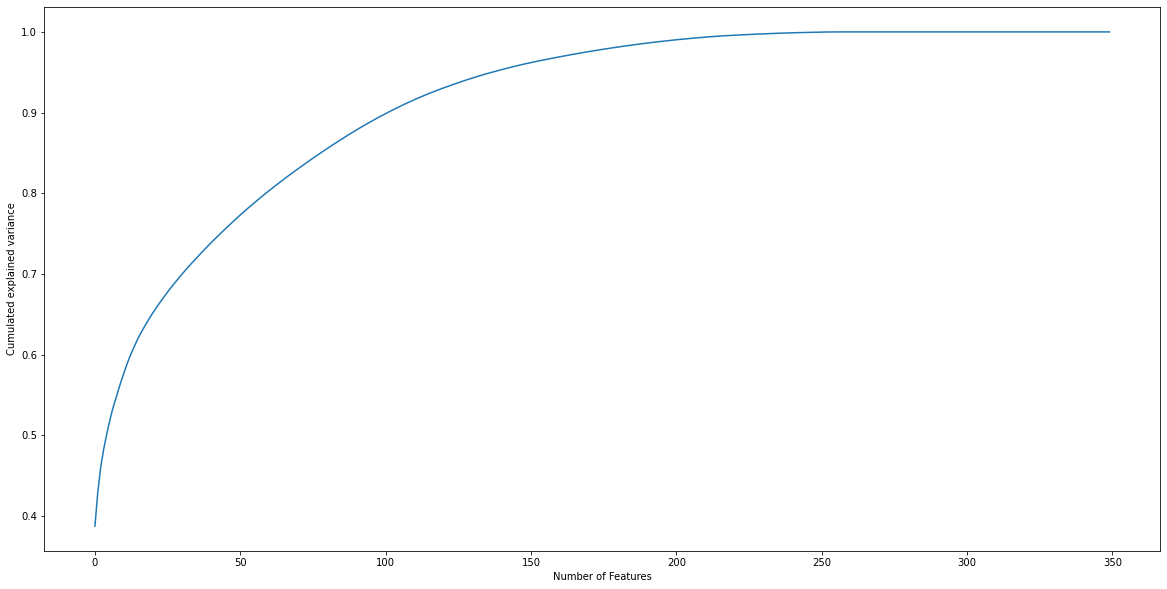

In [659]:
from sklearn.decomposition import PCA
pca = PCA().fit(azdias_cleaned)
plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Cumulated explained variance')
plt.show()

#### Result 

Based on the diagram above the optimal value must be bettwen 200 and 225. So we decide to calculate the PCA value for a specific range.

In [396]:
# Range that we want to calculate the explained variance sum
list_components=[200,205,210,215,220,225]

In [578]:
# Check Explained Variance for Range Components for the Azdias Dataframe

for element in list_components:

    pca = PCA(n_components=element).fit(azdias_cleaned)
    reduced_data = pca.transform(azdias_cleaned)
    azdias_reduced_data = pd.DataFrame(reduced_data)
    print(element,pca.explained_variance_ratio_.sum())

200 0.9897981802786269
205 0.9916204873004296
210 0.9932623424171176
215 0.9946235515301173
220 0.9956880198435937
225 0.9966139456752603


In [398]:
# Check Explained Variance for Range Components for the Customers Dataframe

for element in list_components:

    pca = PCA(n_components=element).fit(customers_cleaned)
    reduced_data = pca.transform(customers_cleaned)
    customers_reduced_data = pd.DataFrame(reduced_data)
    print(element,pca.explained_variance_ratio_.sum())

200 0.9960456835250172
205 0.9966192784591631
210 0.9971219860193166
215 0.9975738105948513
220 0.9979797916284601
225 0.9983386024560033


Based on the result we can see that the value for cummulated explained variance does not change siginificantly after 200 features.
So we decide to keep 205 Features to have a cummulated explained variance for 99.16 % in the azdias dataframe and 99.66 % in the customers dataframe.

In [686]:
# Reduced data with azdias dataframe based on 205 components
pca = PCA(n_components=205).fit(azdias_cleaned)
azdias_reduced_data = pca.transform(azdias_cleaned)
azdias_reduced_data = pd.DataFrame(azdias_reduced_data)
azdias_reduced_data.shape


(447024, 205)

In [687]:
# Reduced data with customers dataframe based on 205 components
pca = PCA(n_components=205).fit(customers_cleaned)
customers_reduced_data = pca.transform(customers_cleaned)
customers_reduced_data = pd.DataFrame(customers_reduced_data)
customers_reduced_data.shape

(85951, 205)

Check the most relevant features on the Principal Components on Azdias dataframe

In [796]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

initial_feature_names = azdias_cleaned.columns.tolist()


# 10 samples with 5 features
train_features = azdias_cleaned.copy()

model = PCA(n_components=205).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


# build the dataframe
df = pd.DataFrame(dic.items())

# Rename Columns
df.columns= ['PC','Feature']

df


,PC,Feature
0,PC0,OST_WEST_KZ_-1
1,PC1,LP_STATUS_FEIN
2,PC2,CJT_TYP_1
3,PC3,MOBI_RASTER
4,PC4,KBA05_MAXVORB
5,PC5,OST_WEST_KZ_O
6,PC6,SEMIO_DOM
7,PC7,CAMEO_DEU_2015_6B
8,PC8,CAMEO_INTL_2015_41
9,PC9,CAMEO_DEU_2015_2D


In [ ]:
Check the most relevant features on the Principal Components on Customers dataframe

In [797]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

initial_feature_names = customers_cleaned.columns.tolist()


# 10 samples with 5 features
train_features = azdias_cleaned.copy()

model = PCA(n_components=205).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


# build the dataframe
df = pd.DataFrame(dic.items())

# Rename Columns
df.columns= ['PC','Feature']

df

,PC,Feature
0,PC0,D19_LETZTER_KAUF_BRANCHE_D19_LOTTO
1,PC1,KBA13_SEG_GELAENDEWAGEN
2,PC2,CJT_TYP_1
3,PC3,KBA13_SEG_KLEINST
4,PC4,KBA05_KRSVAN
5,PC5,D19_LETZTER_KAUF_BRANCHE_D19_NAHRUNGSERGAENZUNG
6,PC6,KBA13_SEG_SONSTIGE
7,PC7,CAMEO_DEU_2015_3A
8,PC8,CAMEO_DEUG_2015_8
9,PC9,VHA


### Elbow Method: Identify Cluster 

https://medium.com/@dmitriy.kavyazin/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2

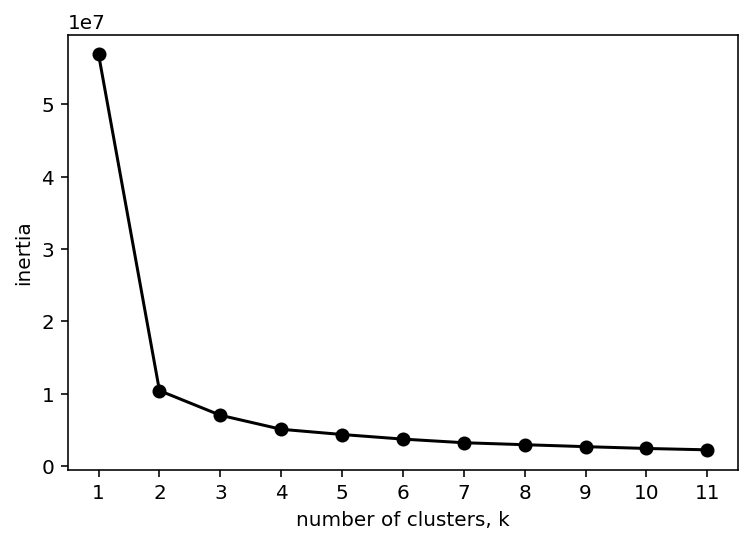

In [799]:
# Identify the optiomal number of clusters based on the elbow method

from sklearn.cluster import KMeans
ks = range(1, 12)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(azdias_reduced_data.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### Analyze Cluster

In [605]:
# We use 4 as the optiomal cluster number (based on the previous data)
kmeans_k = KMeans(4)
model_k = kmeans_k.fit(azdias_reduced_data)

# Prediction on Azdias
azdias_pred = model_k.predict(azdias_reduced_data)
# Identify Azdias Cluster
azdias_cluster = pd.DataFrame(azdias_pred, columns = ['Cluster'])

# Prediction on Customers
customers_pred = model_k.predict(customers_reduced_data)
# Identify Customers Cluster
customer_cluster = pd.DataFrame(customers_pred, columns = ['Cluster'])

In [606]:
# AZDIAS - Data Frame to Count Values in each Cluster
CLUSTER_AZDIAS = pd.Series(azdias_pred)
cluster_azdias_total = CLUSTER_AZDIAS.value_counts().sort_index()

In [607]:
# CUSTOMERS - Data Frame to Count Values in each Cluster
CLUSTER_CUSTOMERS = pd.Series(customers_pred)
cluster_customers_total = CLUSTER_CUSTOMERS.value_counts().sort_index()

In [608]:
# Create a dataframe to compare the Azdias and the customers dataframe
df_Comparison = pd.concat([cluster_azdias_total, cluster_customers_total], axis=1).reset_index()

#Rename Columns
df_Comparison.columns = ['Cluster Number','Count Azdias Population','Count Customers Population']

#Create Delta Column
df_Comparison['Delta in %']=(df_Comparison['Count Customers Population']/df_Comparison['Count Customers Population'].sum()*100) - (df_Comparison['Count Azdias Population']/df_Comparison['Count Azdias Population'].sum()*100)

# Create Columns for Ratio Azdias and Customers
df_Comparison['Ratio Azdias in %'] = (df_Comparison['Count Azdias Population']/df_Comparison['Count Azdias Population'].sum()*100).round(2)
df_Comparison['Ratio Customers in %'] = (df_Comparison['Count Customers Population']/df_Comparison['Count Customers Population'].sum()*100).round(2)

# Print Dataframe
df_Comparison

,Cluster Number,Count Azdias Population,Count Customers Population,Delta in %,Ratio Azdias in %,Ratio Customers in %
0,0,198854,45010,7.883081,44.48,52.37
1,1,16584,811,-2.766307,3.71,0.94
2,2,93489,35849,20.795006,20.91,41.71
3,3,138097,4281,-25.911780,30.89,4.98


Now we can analyze in detail the proportion of each cluster within the Azdias and the Customers 

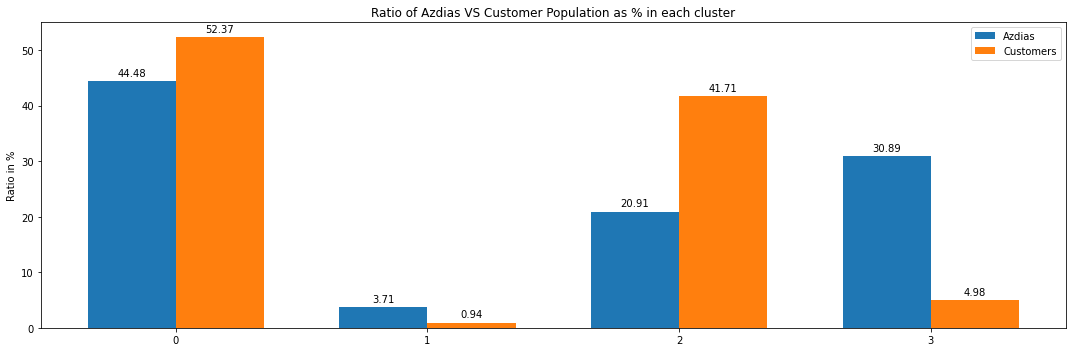

In [609]:
#Define Labels
labels = df_Comparison['Cluster Number'].tolist()
azdias = df_Comparison['Ratio Azdias in %'].tolist()
customers = df_Comparison['Ratio Customers in %'].tolist()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 5))

rects1 = ax.bar(x - width/2, azdias, width, label='Azdias')
rects2 = ax.bar(x + width/2, customers, width, label='Customers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio in %')
ax.set_title('Ratio of Azdias VS Customer Population as % in each cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


fig.tight_layout()

plt.show()

From the analysis above we can see that we have over representation of customers in cluster 2 and an under representation of customers in cluster 3.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [924]:
#mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')
mailout_train = pd.read_csv('mailout_train.csv')

C:\Users\49151\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [866]:
mailout_train.shape

(42962, 368)

In [867]:
# Split into X and y
# Base Variables -> Remove Response
X = mailout_train.drop('RESPONSE',axis=1)
y = mailout_train['RESPONSE']

In [861]:
print(df_mailout_train.shape)

(15455, 392)


In [869]:
# Preprocess data
df_mailout_train  = PrepareData(X)

In [871]:
# Split into train and test
from sklearn.model_selection import train_test_split

# Split Train Test
X_train, X_val, y_train, y_val = train_test_split(df_mailout_train, y, stratify=y, test_size=0.2, random_state=42)

In [922]:
from xgboost.sklearn import XGBRegressor # Extreme Gradient Boosting
import xgboost as xgb

xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_val)


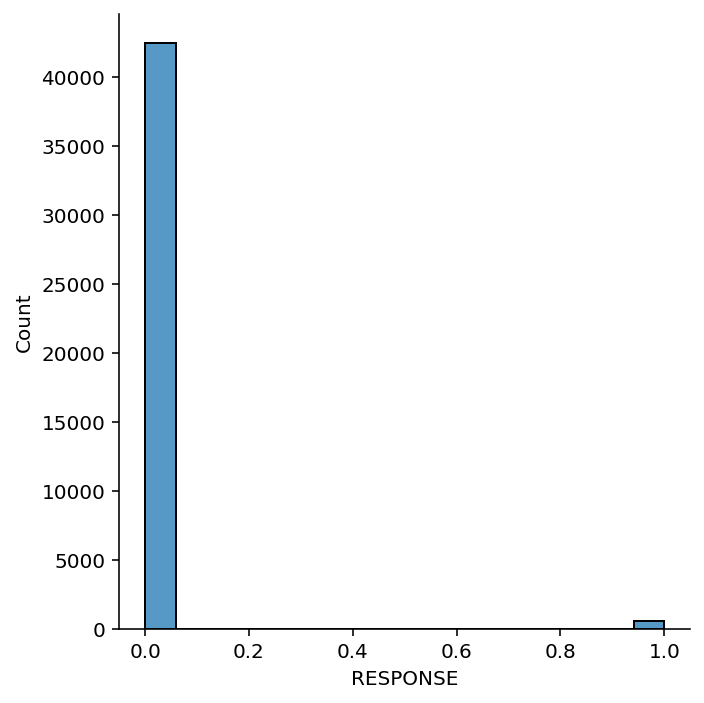

In [935]:
# Look at the value distribution of Response
sns.displot(mailout_train, x="RESPONSE")

To evaluate the result we use the ROC score. Because of the fact that the provided data is pretty imbalanced it is not recommended to use Measures like F1 Score, Mean Absolute Error, Mean Squared Error.

In [936]:
from sklearn.metrics import roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score
print("ROC score: {:.4f}".format(roc_auc_score(y_val, preds)))


ROC score: 0.5731


Because of the reason that our model achieved a value of 0.5731 we need to focus on optimization.

#### Evaluation and Optimization

In [959]:
from sklearn.model_selection import GridSearchCV

# XGB Initialization
alg_xgb = XGBRegressor(random_state=42)
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective' : ['binary:logistic'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

cv = GridSearchCV(alg_xgb,
                        parameters,
                        scoring = 'roc_auc',
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

# Fit the grid search object to the training data and return best parameters
grid_fit = cv.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed: 10.0min finished


[20:21:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [973]:
# Print best parameters
cv.best_params_


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.7}

In [ ]:
{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'binary:logistic',
 'silent': 1,
 'subsample': 0.7}

In [974]:
# Get the estimator and predict
best_clf = grid_fit.best_estimator_

# Make Predictions best on the best
best_predictions = best_clf.predict(X_val)

#Calculate roc score on y val
roc_auc_score(y_val, best_predictions)


0.7836769220850536

With the help of Grid Search we could improve the ROC score to 0.7836. That is an improvement of 0.21 compared to the first run.


In [984]:
# Use Final Parameter for Train
best_params = XGBRegressor(
     colsample_bytree= 0.7,
     learning_rate= 0.03,
     max_depth=5,
     min_child_weight= 4,
     n_estimators= 500,
     nthread= 4,
     objective= 'binary:logistic',
     silent= 1,
     subsample= 0.7)

predictions = best_params.fit(X_train,y_train)
predictions_test = predictions.predict(X_val)
print('ROC AUC SCORE:',roc_auc_score(y_val, predictions_test))

[21:31:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


ROC AUC SCORE: 0.7703202011511502


Now that we have a reliable ROC AUC Score we can analyze the most important features. 

Text(0, 0.5, 'Feature')

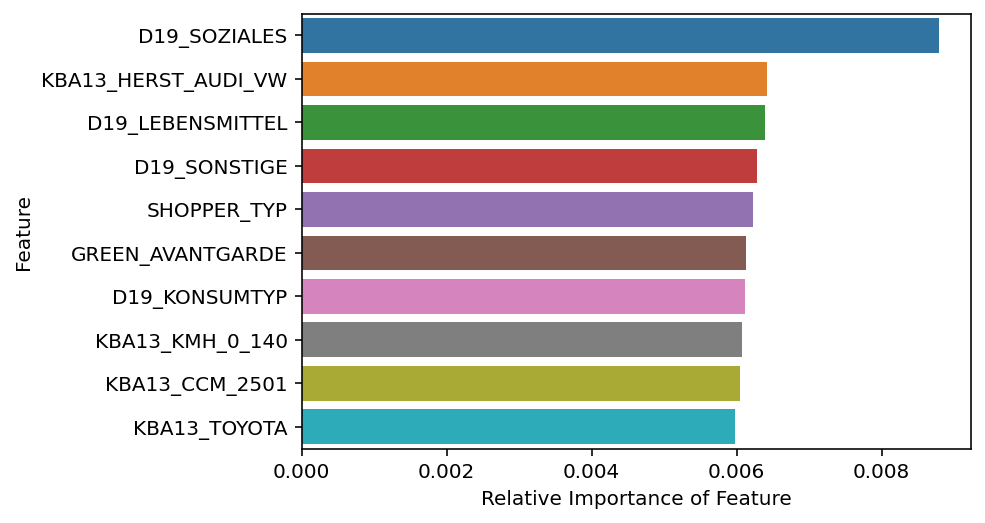

In [999]:
# Number of features that should be displayed
features = 10
# Create indice for features
indices = np.argsort(feat_importance)[::-1]
# Create feature columns
feature_columns = X_train.columns.values[indices[:features]]
# Create feature impoortance
feature_importance = feat_importance[indices][:features]

# Create Bar Chart
ax = sns.barplot(x=feature_importance, y=feature_columns)
ax.set_xlabel('Relative Importance of Feature')
ax.set_ylabel('Feature')



## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')